In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

Dataset shape: (194685, 35)

First few rows:


year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   
3  2018      Q1          1.0  Atlanta           1100 Circle 75   
4  2018      Q1          1.0  Atlanta             1200 Ashwood   

                                         building_id                address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...     10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...   3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...   1000 Parkwood Cir SE   
3  Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...  1100 Circle 75 Pky SE   
4  Atlanta_Central Perimeter_Atlanta_1200 Ashwood...       1200 Ashwood Pky   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689                    NaN   
1  South  Atlanta    GA  ...     24.345689                    NaN   
2  South  Atlanta    GA  ...     24.345689                    NaN   
3  South  Atlanta    GA  ...     24.345689                    NaN   
4  South  Atlanta    GA  ...     24.345689                    NaN   

  direct_availability_proportion  direct_internal_class_rent  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   

  direct_overall_rent sublet_available_space sublet_availability_proportion  \
0                 NaN                    NaN                            NaN   
1                 NaN                    NaN                            NaN   
2                 NaN                    NaN                            NaN   
3                 NaN                    NaN                            NaN   
4                 NaN                    NaN                            NaN   

  sublet_internal_class_rent  sublet_overall_rent    leasing  
0                        NaN                  NaN  1205126.0  
1                        NaN                  NaN  1205126.0  
2                        NaN                  NaN  1205126.0  
3                        NaN                  NaN   715742.0  
4                        NaN                  NaN  1205126.0  

[5 rows x 35 columns]


Basic statistics:


year    monthsigned            zip      leasedSF  \
count  194685.000000  193822.000000  194684.000000  1.946850e+05   
mean     2020.897116       6.398458   54834.565671  7.418951e+03   
std         2.053467       3.415922   32228.307406  2.366310e+04   
min      2018.000000       1.000000    1420.000000  1.000000e+00   
25%      2019.000000       3.000000   22102.000000  1.265000e+03   
50%      2021.000000       6.000000   60607.000000  2.578000e+03   
75%      2023.000000       9.000000   85004.000000  5.818000e+03   
max      2024.000000      12.000000   98499.000000  1.463234e+06   

           costarID           RBA  available_space  availability_proportion  \
count  1.946850e+05  1.455410e+05     1.455410e+05            145541.000000   
mean   8.585231e+05  8.734066e+07     1.761325e+07                 0.205129   
std    2.098700e+06  5.975856e+07     1.178294e+07                 0.059300   
min    1.100000e+01  2.010185e+07     1.782779e+06                 0.057300   
25%    1.578120e+05  4.641436e+07     8.345927e+06                 0.165001   
50%    2.802520e+05  6.585438e+07     1.415498e+07                 0.197558   
75%    4.306400e+05  1.153246e+08     2.345972e+07                 0.247710   
max    2.024547e+07  2.683833e+08     5.457790e+07                 0.414977   

       internal_class_rent   overall_rent  direct_available_space  \
count        145541.000000  145541.000000            1.216740e+05   
mean             37.162132      39.730471            1.516990e+07   
std              16.183660      16.430368            9.717183e+06   
min              16.957171      18.749409            1.544029e+06   
25%              25.050378      28.860444            7.436069e+06   
50%              32.582522      34.004225            1.218762e+07   
75%              43.667669      44.548462            2.121029e+07   
max              94.191224      84.746663            4.092899e+07   

       direct_availability_proportion  direct_internal_class_rent  \
count                   121674.000000               121674.000000   
mean                         0.090624                   38.532872   
std                          0.035829                   17.322360   
min                          0.021800                   18.009119   
25%                          0.064500                   25.717730   
50%                          0.082600                   33.578010   
75%                          0.109500                   46.645537   
max                          0.190500                   99.642941   

       direct_overall_rent  sublet_available_space  \
count        121674.000000            1.216740e+05   
mean             41.348356            3.067042e+06   
std              17.641388            2.875391e+06   
min              19.990075            1.108040e+05   
25%              29.429358            9.483450e+05   
50%              35.731458            1.680762e+06   
75%              46.250885            4.512948e+06   
max              88.438174            1.435339e+07   

       sublet_availability_proportion  sublet_internal_class_rent  \
count                   121674.000000               121674.000000   
mean                         0.017164                   32.218578   
std                          0.011111                   13.148892   
min                          0.001700                   14.149920   
25%                          0.008600                   23.251198   
50%                          0.014000                   28.384836   
75%                          0.024200                   38.640250   
max                          0.074600                   86.324412   

       sublet_overall_rent       leasing  
count        121674.000000  1.455410e+05  
mean             34.264252  1.327221e+06  
std              12.922946  1.234172e+06  
min              16.865199  5.520300e+04  
25%              24.678567  5.355900e+05  
50%              30.803734  8.893690e+05  
75%              39.026963  1.660927e


Missing data analysis:


Missing Values  Percentage
internal_industry                       168284       86.44
company_name                            157469       80.88
internal_market_cluster                 118847       61.05
sublet_overall_rent                      73011       37.50
sublet_internal_class_rent               73011       37.50
sublet_availability_proportion           73011       37.50
sublet_available_space                   73011       37.50
direct_overall_rent                      73011       37.50
direct_internal_class_rent               73011       37.50
direct_availability_proportion           73011       37.50
direct_available_space                   73011       37.50
RBA                                      49144       25.24
overall_rent                             49144       25.24
internal_class_rent                      49144       25.24
availability_proportion                  49144       25.24
available_space                          49144       25.24
leasing                                  49144       25.24
building_name                            36686       18.84
space_type                                7545        3.88
monthsigned                                863        0.44
transaction_type                           539        0.28
internal_class                               9        0.00
zip                                          1        0.00


Number of large leases (≥10,000 sq ft): 29789


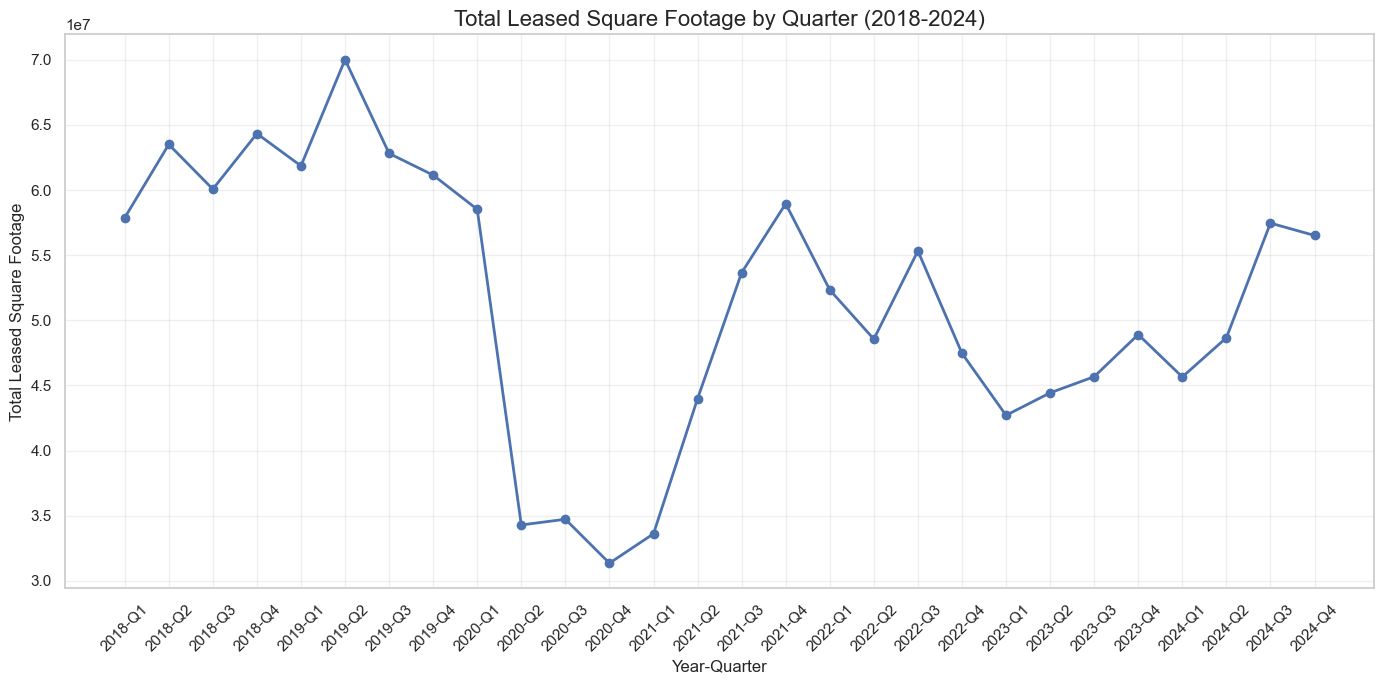

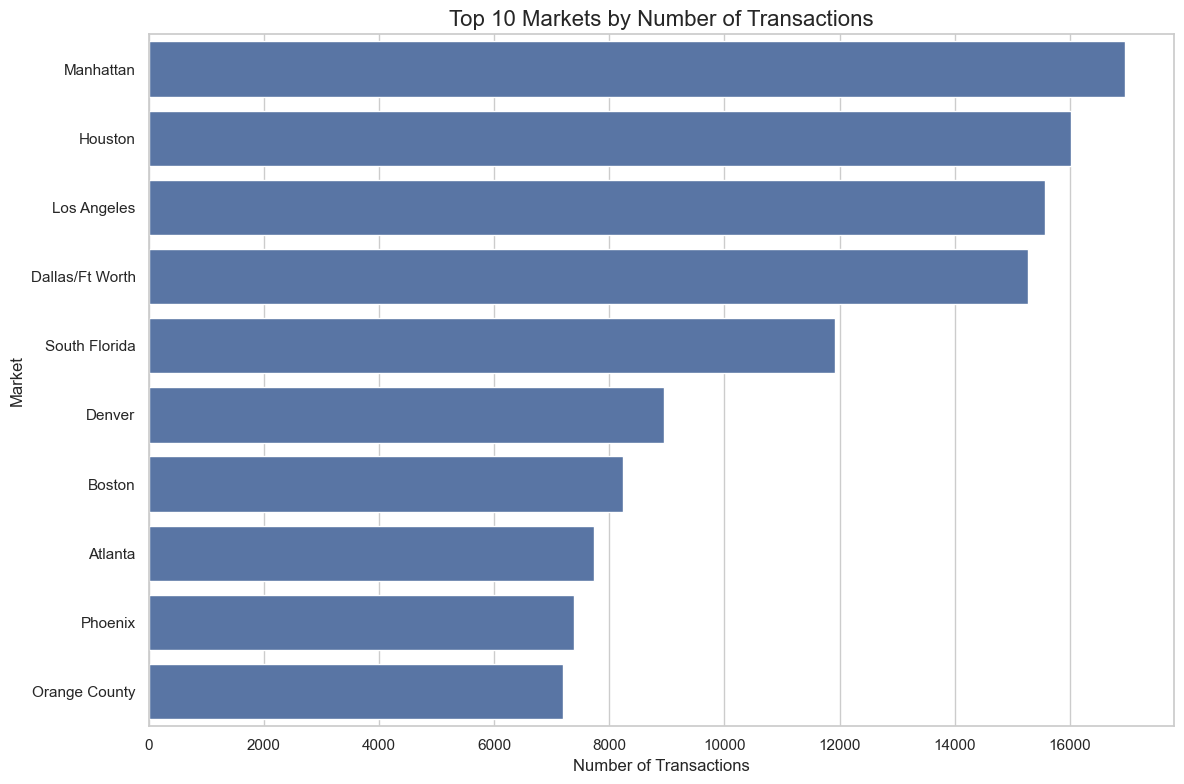

<Figure size 1400x800 with 0 Axes>

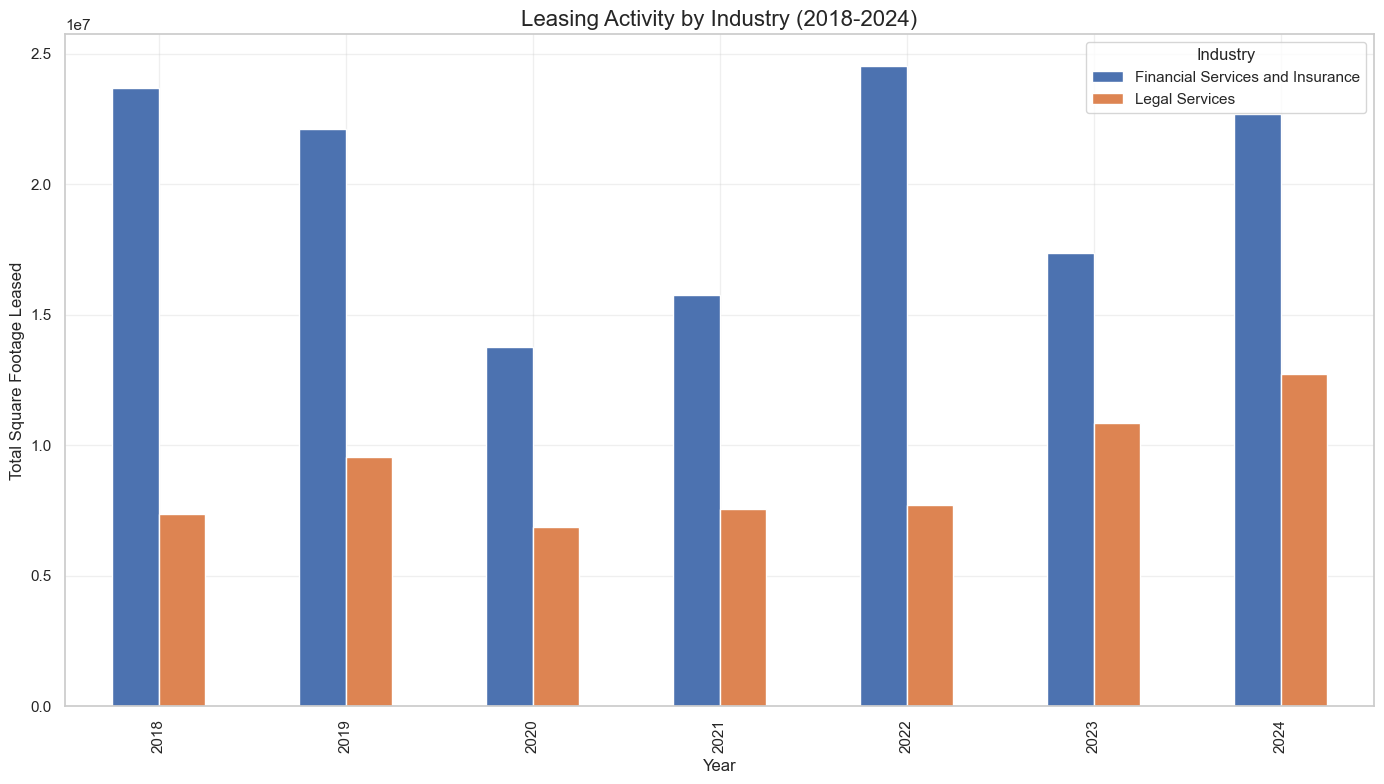

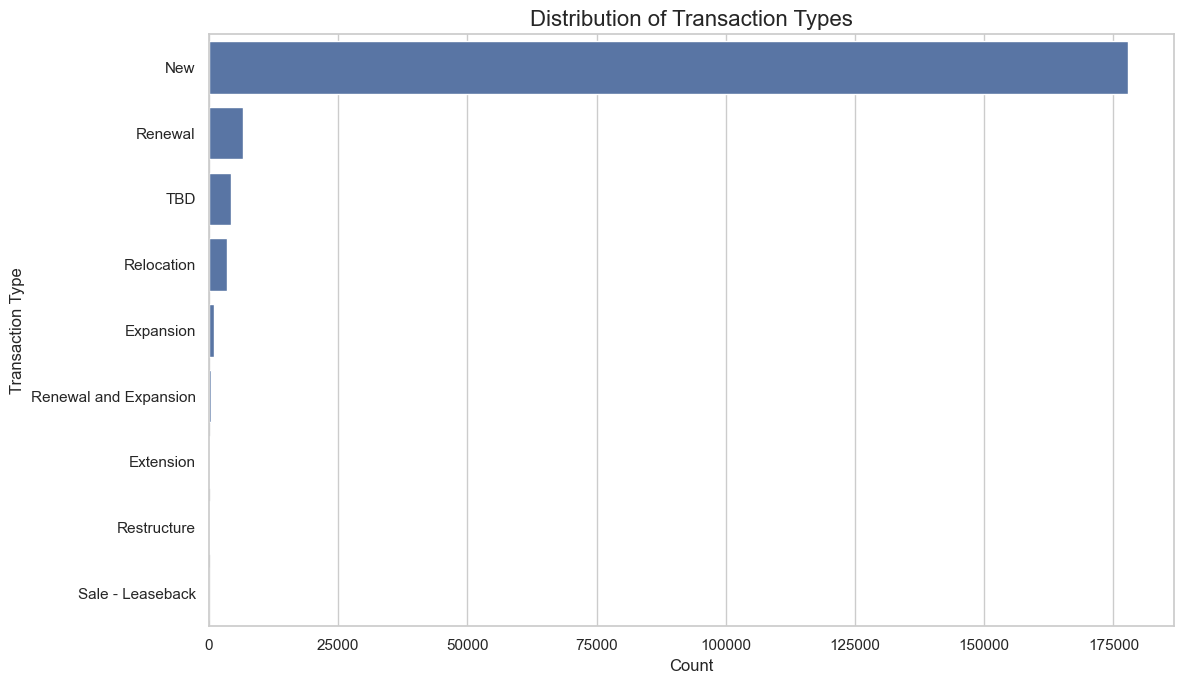

<Figure size 1400x800 with 0 Axes>

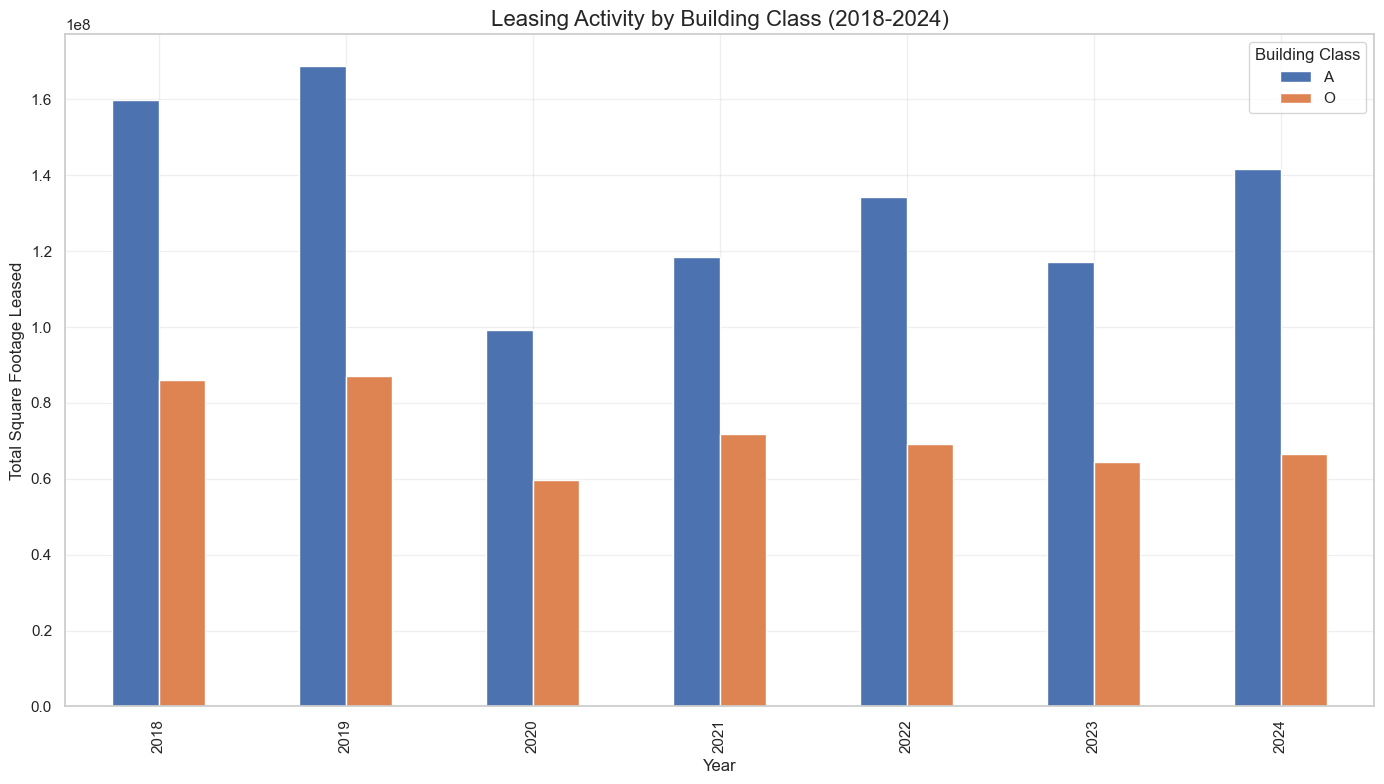

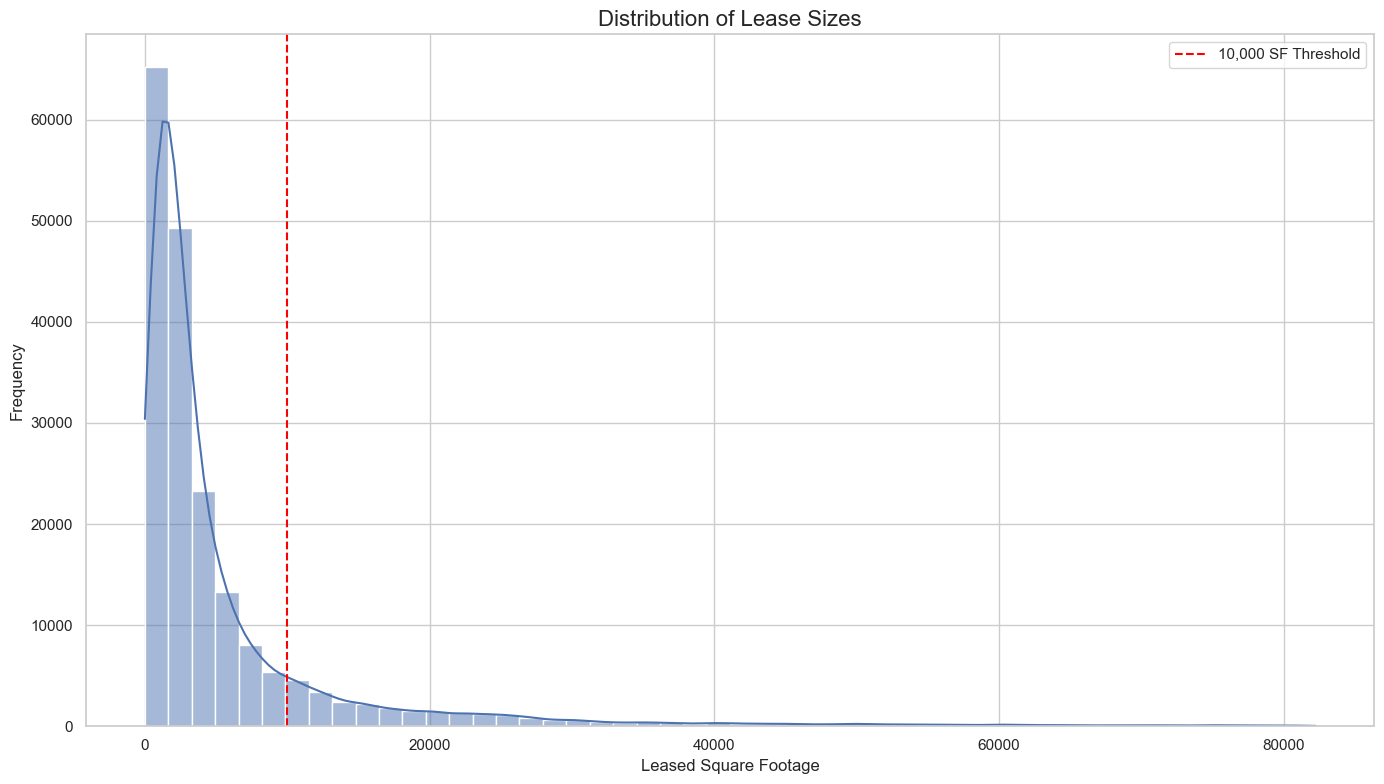

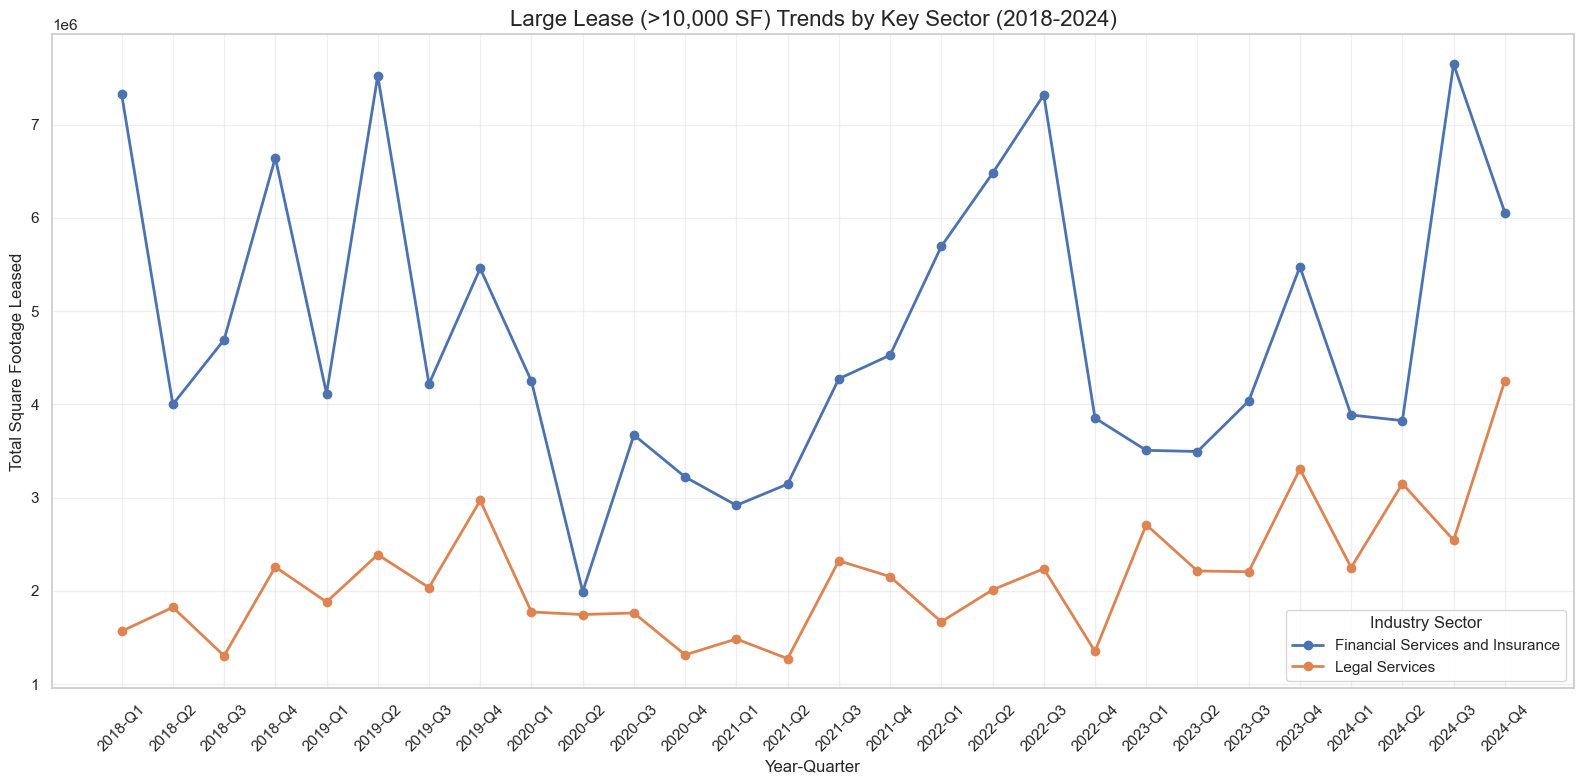

<Figure size 1400x800 with 0 Axes>

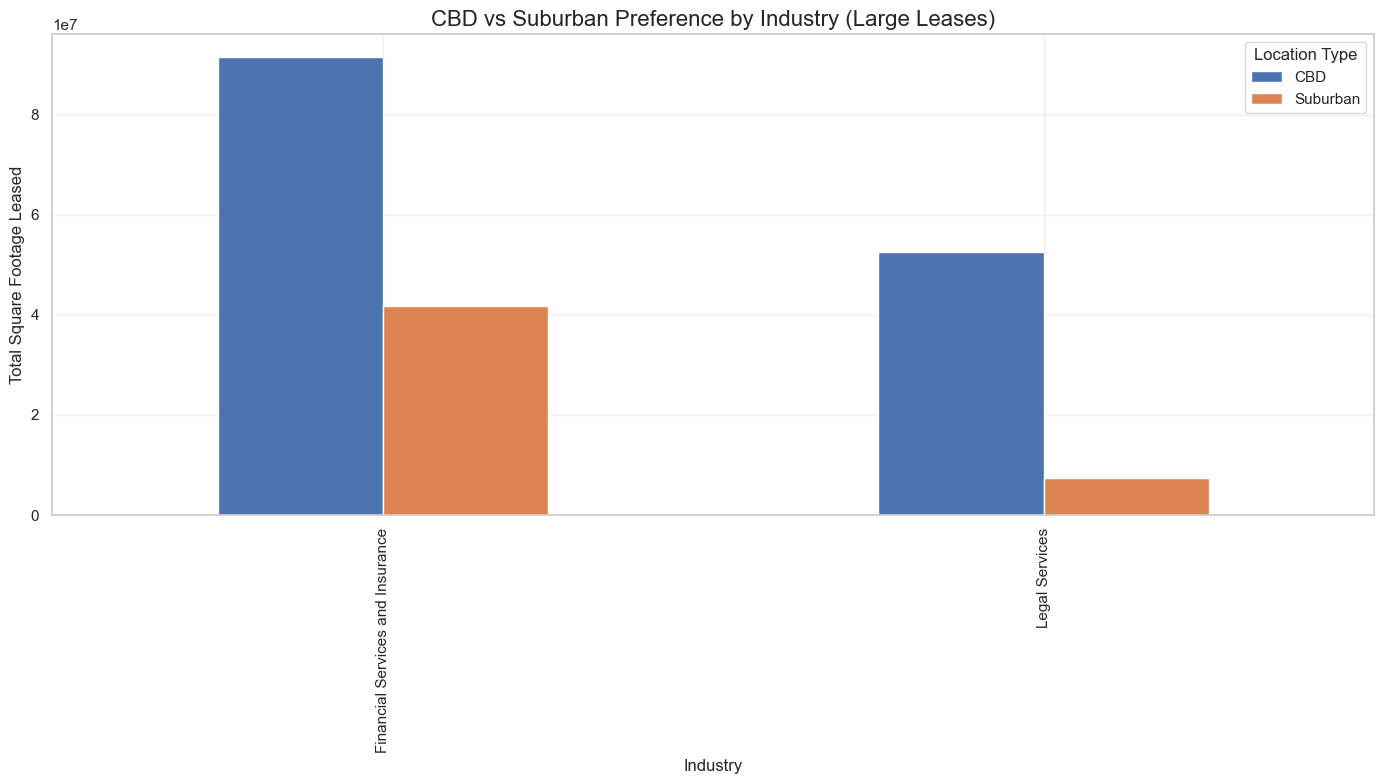

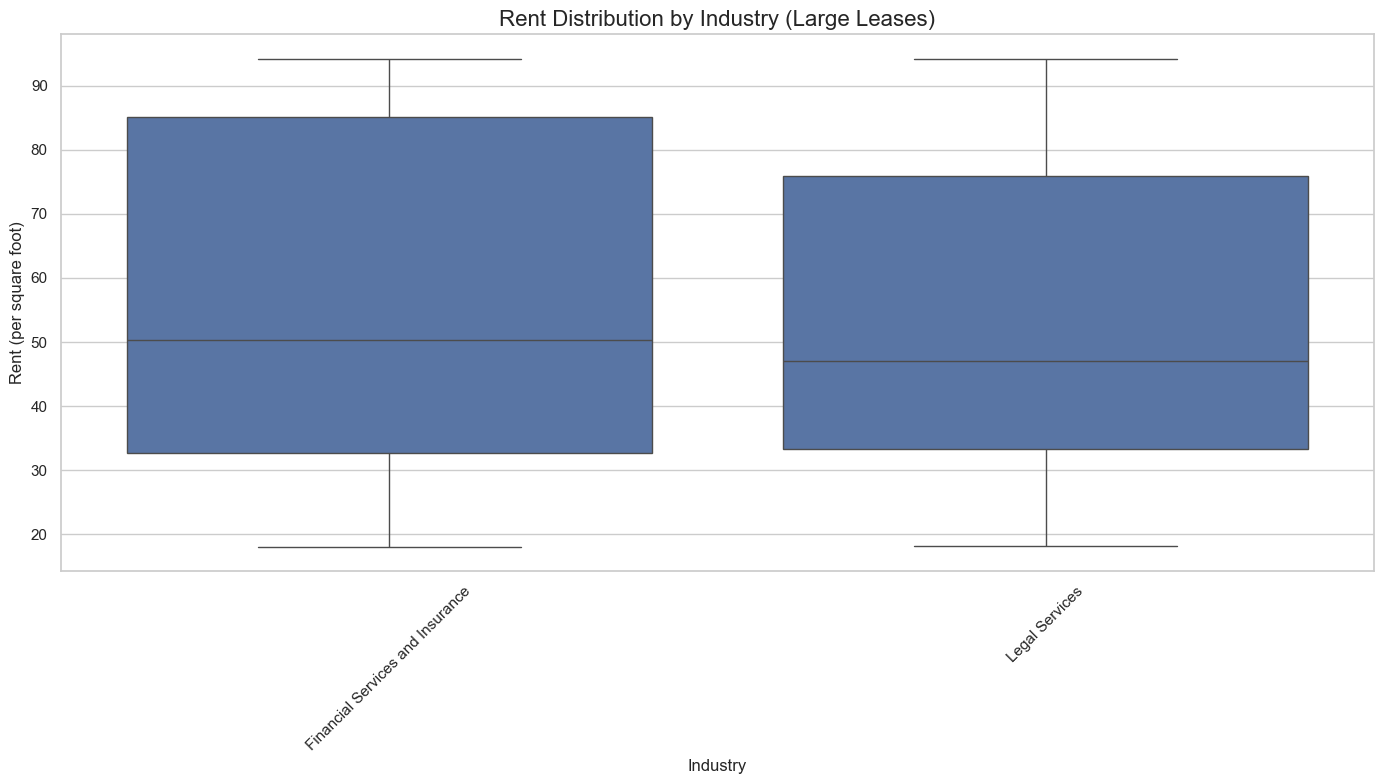

Could not create pandemic summary: If using all scalar values, you must pass an index


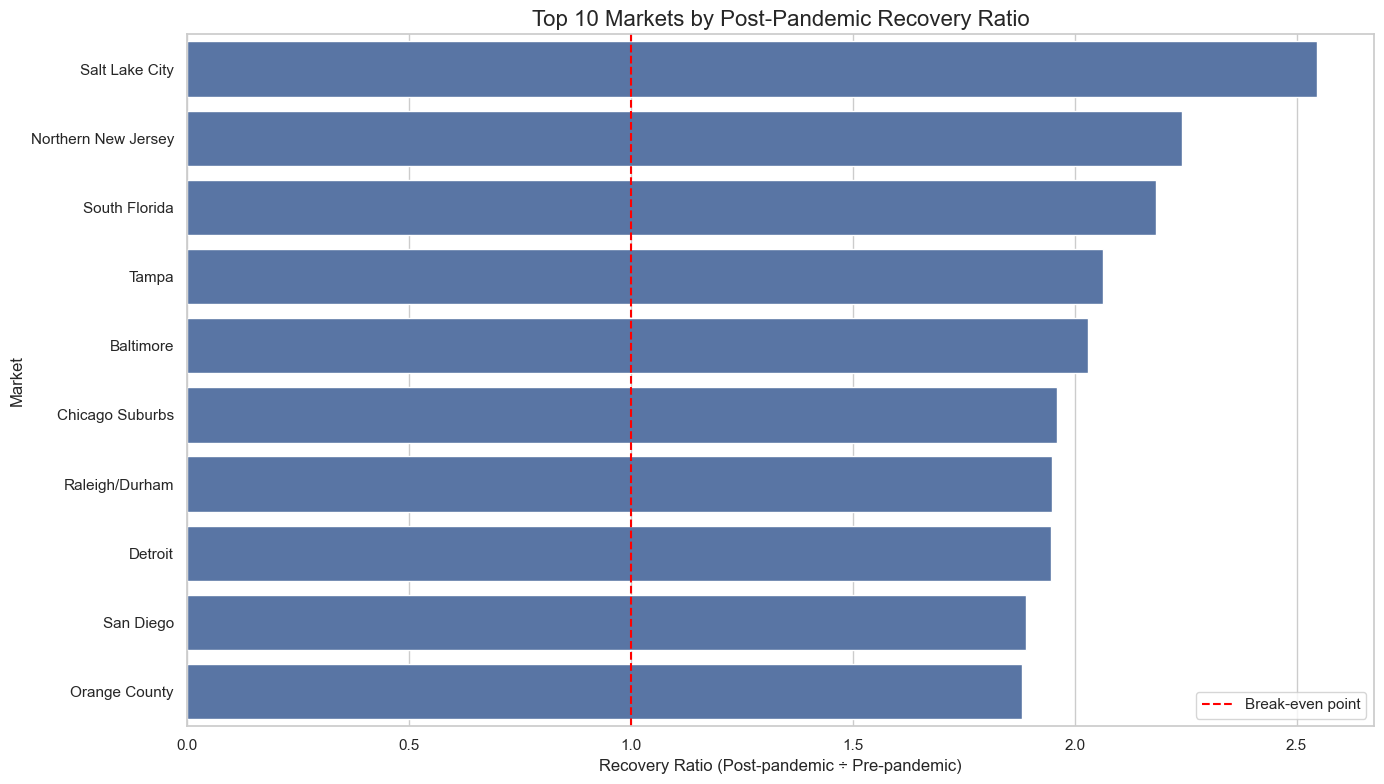

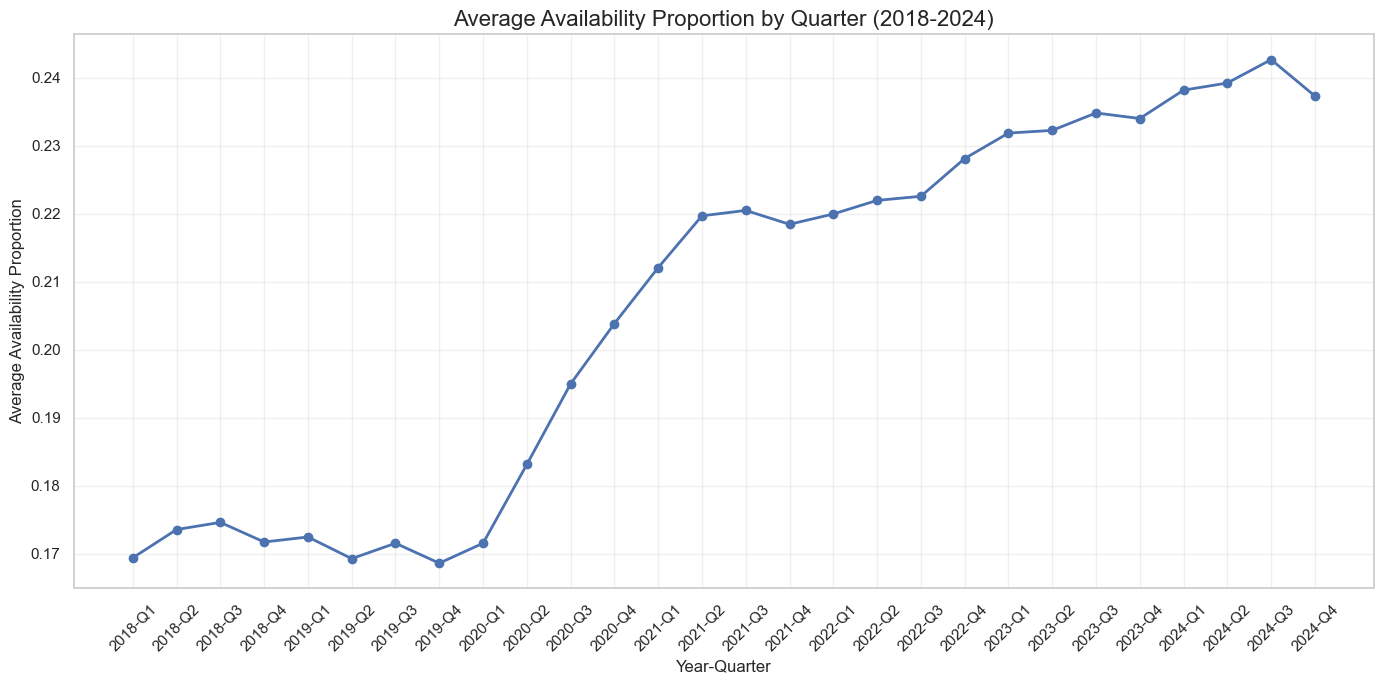

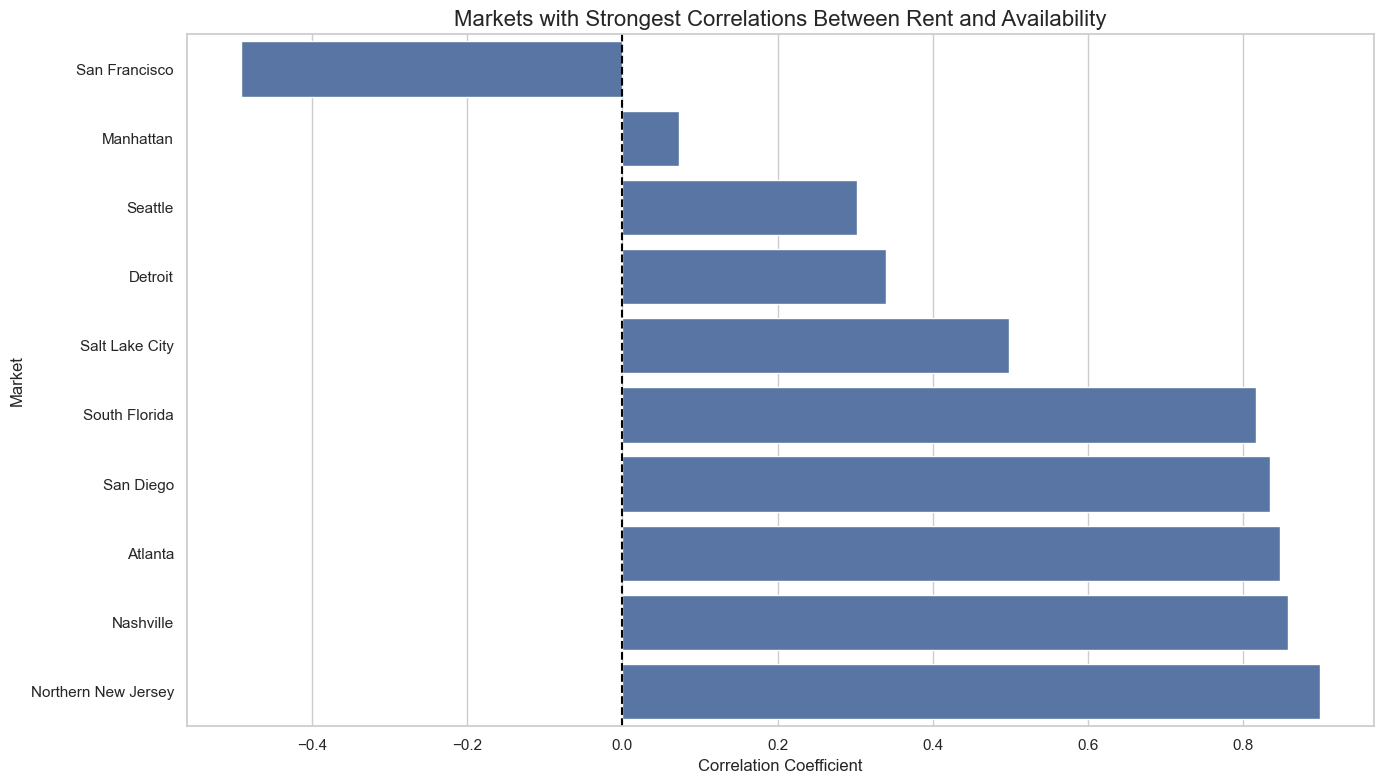

Exploratory analysis complete. Check the generated visualizations to understand the data patterns.


In [4]:
# Set plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('Leases.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

# Check missing data
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print("\nMissing data analysis:")
display(missing_df[missing_df['Missing Values'] > 0])

# Convert numeric columns if needed
numeric_cols = ['leasedSF', 'RBA', 'available_space', 'availability_proportion', 
                'internal_class_rent', 'overall_rent', 'zip']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create year_quarter column for time-based analysis
if 'year' in df.columns and 'quarter' in df.columns:
    df['year_quarter'] = df['year'].astype(str) + '_' + df['quarter']

# Focus on leases over 10,000 sq ft as recommended in the challenge
if 'leasedSF' in df.columns:
    large_leases = df[df['leasedSF'] >= 10000].copy()
    print(f"\nNumber of large leases (≥10,000 sq ft): {len(large_leases)}")
else:
    print("\nWarning: 'leasedSF' column not found. Cannot filter large leases.")

# 1. Time Series Analysis - Leasing Activity by Year/Quarter
try:
    if 'year' in df.columns and 'quarter' in df.columns and 'leasedSF' in df.columns:
        time_series = df.groupby(['year', 'quarter'])['leasedSF'].sum().reset_index()
        time_series['year_quarter'] = time_series['year'].astype(str) + '-' + time_series['quarter']
        
        # Create the plot
        plt.figure(figsize=(14, 7))
        plt.plot(time_series['year_quarter'], time_series['leasedSF'], marker='o', linewidth=2)
        plt.title('Total Leased Square Footage by Quarter (2018-2024)', fontsize=16)
        plt.xlabel('Year-Quarter', fontsize=12)
        plt.ylabel('Total Leased Square Footage', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Missing required columns for time series analysis")
except Exception as e:
    print(f"Error in time series analysis: {e}")

# 2. Market Analysis - Top Markets by Transaction Volume
try:
    if 'market' in df.columns:
        market_counts = df['market'].value_counts().reset_index()
        market_counts.columns = ['Market', 'Number of Transactions']
        top_markets = market_counts.head(10)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Number of Transactions', y='Market', data=top_markets)
        plt.title('Top 10 Markets by Number of Transactions', fontsize=16)
        plt.xlabel('Number of Transactions', fontsize=12)
        plt.ylabel('Market', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'market' not found in dataset - skipping market analysis")
except Exception as e:
    print(f"Error in market analysis: {e}")

# 3. Industry Analysis for the three key sectors mentioned
key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
industry_data = df[df['internal_industry'].isin(key_industries)]

# Create a pivot table of industry by year
industry_pivot = pd.pivot_table(
    industry_data, 
    values='leasedSF', 
    index='year',
    columns='internal_industry', 
    aggfunc='sum'
)

# Plot the industry trends
plt.figure(figsize=(14, 8))
industry_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Leasing Activity by Industry (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.legend(title='Industry')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Geographical Analysis - Map of Leasing Activity (if coordinates available)
try:
    if 'state' in df.columns and 'leasedSF' in df.columns:
        # Create state-level summary
        states_data = df.groupby('state')['leasedSF'].sum().reset_index()
        states_data.columns = ['state', 'total_leased_sf']
        
        # Plot on US map using plotly
        fig = px.choropleth(
            states_data,
            locations='state',
            locationmode='USA-states',
            color='total_leased_sf',
            scope='usa',
            color_continuous_scale='Viridis',
            title='Total Leased Square Footage by State'
        )
        fig.update_layout(coloraxis_colorbar=dict(title='Total Leased SF'))
        fig.show()
    else:
        print("Missing required columns for geographical analysis")
except Exception as e:
    print(f"Error in geographical analysis: {e}")
    print("Note: This may be due to missing geopandas library or required column. If using Colab, try installing with !pip install geopandas")

# 5. Transaction Type Analysis
try:
    if 'transaction_type' in df.columns:
        transaction_counts = df['transaction_type'].value_counts().reset_index()
        transaction_counts.columns = ['Transaction Type', 'Count']
        
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Count', y='Transaction Type', data=transaction_counts)
        plt.title('Distribution of Transaction Types', fontsize=16)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel('Transaction Type', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'transaction_type' not found in dataset - skipping transaction type analysis")
except Exception as e:
    print(f"Error in transaction type analysis: {e}")

# 6. Building Class Analysis (A vs O)
try:
    if 'internal_class' in df.columns and 'leasedSF' in df.columns and 'year' in df.columns:
        class_pivot = pd.pivot_table(
            df,
            values='leasedSF',
            index='year',
            columns='internal_class',
            aggfunc='sum'
        )
        
        if not class_pivot.empty:
            plt.figure(figsize=(14, 8))
            class_pivot.plot(kind='bar', figsize=(14, 8))
            plt.title('Leasing Activity by Building Class (2018-2024)', fontsize=16)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Total Square Footage Leased', fontsize=12)
            plt.legend(title='Building Class')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for building class pivot table")
    else:
        print("Missing required columns for building class analysis")
except Exception as e:
    print(f"Error in building class analysis: {e}")

# 7. Lease Size Distribution
try:
    if 'leasedSF' in df.columns:
        plt.figure(figsize=(14, 8))
        # Remove outliers for better visualization (optional)
        lease_sizes = df[df['leasedSF'] < df['leasedSF'].quantile(0.99)]
        sns.histplot(data=lease_sizes, x='leasedSF', bins=50, kde=True)
        plt.title('Distribution of Lease Sizes', fontsize=16)
        plt.xlabel('Leased Square Footage', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.axvline(x=10000, color='red', linestyle='--', label='10,000 SF Threshold')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'leasedSF' not found in dataset - skipping lease size distribution analysis")
except Exception as e:
    print(f"Error in lease size distribution analysis: {e}")

# 8. Create a comprehensive dashboard using Plotly
try:
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            'Total Leased Area by Quarter', 
            'Top Markets by Transaction Volume',
            'Leasing Activity by Industry',
            'Transaction Types',
            'Building Class Comparison',
            'Lease Size Distribution'
        ),
        specs=[
            [{"type": "scatter"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "pie"}],
            [{"type": "bar"}, {"type": "histogram"}]
        ]
    )

    # 8.1 Time Series - conditionally add if data exists
    if 'time_series' in locals() and not time_series.empty and 'year_quarter' in time_series.columns and 'leasedSF' in time_series.columns:
        fig.add_trace(
            go.Scatter(
                x=time_series['year_quarter'], 
                y=time_series['leasedSF'],
                mode='lines+markers'
            ),
            row=1, col=1
        )

    # 8.2 Top Markets - conditionally add if data exists
    if 'top_markets' in locals() and not top_markets.empty and len(top_markets) >= 5:
        fig.add_trace(
            go.Bar(
                y=top_markets['Market'][:5],
                x=top_markets['Number of Transactions'][:5],
                orientation='h'
            ),
            row=1, col=2
        )

    # 8.3 Industry Analysis - conditionally add if data exists
    if 'industry_pivot' in locals() and not industry_pivot.empty:
        for i, industry in enumerate(industry_pivot.columns):
            fig.add_trace(
                go.Bar(
                    x=industry_pivot.index,
                    y=industry_pivot[industry],
                    name=industry
                ),
                row=2, col=1
            )

    # 8.4 Transaction Types - conditionally add if data exists
    if 'transaction_counts' in locals() and not transaction_counts.empty and len(transaction_counts) >= 5:
        fig.add_trace(
            go.Pie(
                labels=transaction_counts['Transaction Type'][:5],
                values=transaction_counts['Count'][:5],
            ),
            row=2, col=2
        )

    # 8.5 Building Class - conditionally add if data exists
    if 'class_pivot' in locals() and not class_pivot.empty:
        if 'A' in class_pivot.columns:
            fig.add_trace(
                go.Bar(
                    x=class_pivot.index,
                    y=class_pivot['A'],
                    name='Class A'
                ),
                row=3, col=1
            )
        if 'O' in class_pivot.columns:
            fig.add_trace(
                go.Bar(
                    x=class_pivot.index,
                    y=class_pivot['O'],
                    name='Other Classes'
                ),
                row=3, col=1
            )

    # 8.6 Lease Size Distribution - conditionally add if data exists
    if 'lease_sizes' in locals() and not lease_sizes.empty:
        fig.add_trace(
            go.Histogram(
                x=lease_sizes['leasedSF'],
                nbinsx=50,
            ),
            row=3, col=2
        )

    # Update layout
    fig.update_layout(
        height=1200,
        width=1200,
        title_text="Savills Commercial Real Estate - Key Insights Dashboard",
        showlegend=False
    )

    fig.show()
except Exception as e:
    print(f"Error creating dashboard: {e}")

# 9. Additional Analysis for the Three Key Sectors (Legal, Financial, Tech)
# Focusing on large leases (>10,000 SF) as recommended
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'leasedSF' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty and 'year' in key_sectors_large.columns and 'quarter' in key_sectors_large.columns:
                # Examine trends over time by sector
                sector_time_pivot = pd.pivot_table(
                    key_sectors_large,
                    values='leasedSF',
                    index=['year', 'quarter'],
                    columns='internal_industry',
                    aggfunc='sum'
                ).reset_index()
                
                if not sector_time_pivot.empty:
                    sector_time_pivot['year_quarter'] = sector_time_pivot['year'].astype(str) + '-' + sector_time_pivot['quarter']
                    
                    # Plot sector trends
                    plt.figure(figsize=(16, 8))
                    for industry in target_industries:
                        if industry in sector_time_pivot.columns:
                            plt.plot(
                                sector_time_pivot['year_quarter'], 
                                sector_time_pivot[industry], 
                                marker='o', 
                                linewidth=2,
                                label=industry
                            )
                    
                    plt.title('Large Lease (>10,000 SF) Trends by Key Sector (2018-2024)', fontsize=16)
                    plt.xlabel('Year-Quarter', fontsize=12)
                    plt.ylabel('Total Square Footage Leased', fontsize=12)
                    plt.xticks(rotation=45)
                    plt.legend(title='Industry Sector')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No data available for sector time pivot table")
            else:
                print("Missing time data or no key sector data available for large leases")
        else:
            print(f"None of the target industries {key_industries} found in large leases data")
    else:
        print("Missing required columns or large_leases data for key sectors analysis")
except Exception as e:
    print(f"Error in key sectors analysis: {e}")

# 10. CBD vs Suburban Analysis for Key Sectors
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'CBD_suburban' in large_leases.columns and 'leasedSF' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty:
                location_sector_pivot = pd.pivot_table(
                    key_sectors_large,
                    values='leasedSF',
                    index='internal_industry',
                    columns='CBD_suburban',
                    aggfunc='sum'
                )
                
                if not location_sector_pivot.empty:
                    plt.figure(figsize=(14, 8))
                    location_sector_pivot.plot(kind='bar', figsize=(14, 8))
                    plt.title('CBD vs Suburban Preference by Industry (Large Leases)', fontsize=16)
                    plt.xlabel('Industry', fontsize=12)
                    plt.ylabel('Total Square Footage Leased', fontsize=12)
                    plt.legend(title='Location Type')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No data available for CBD vs Suburban pivot table")
            else:
                print("No key sector data available for CBD vs Suburban analysis")
        else:
            print(f"None of the target industries {key_industries} found in the data")
    else:
        print("Missing required columns for CBD vs Suburban analysis")
except Exception as e:
    print(f"Error in CBD vs Suburban analysis: {e}")

# 11. Rent Analysis for Key Sectors
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'internal_class_rent' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty:
                # Remove rows with null rent values
                rent_data = key_sectors_large.dropna(subset=['internal_class_rent'])
                
                if not rent_data.empty:
                    plt.figure(figsize=(14, 8))
                    sns.boxplot(x='internal_industry', y='internal_class_rent', data=rent_data)
                    plt.title('Rent Distribution by Industry (Large Leases)', fontsize=16)
                    plt.xlabel('Industry', fontsize=12)
                    plt.ylabel('Rent (per square foot)', fontsize=12)
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No rent data available for key sectors")
            else:
                print("No key sector data available for rent analysis")
        else:
            print(f"None of the target industries {key_industries} found in the data")
    else:
        print("Missing required columns for rent analysis")
except Exception as e:
    print(f"Error in rent analysis: {e}")

# 12. Pandemic Impact Analysis - Compare pre and post pandemic trends
# Define pre and post pandemic periods
df['pandemic_period'] = 'Pre-pandemic'
df.loc[((df['year'] == 2020) & (df['quarter'].isin(['Q2', 'Q3', 'Q4']))) | 
       (df['year'] > 2020), 'pandemic_period'] = 'Post-pandemic'

# Check if required columns exist first
if 'leasedSF' in df.columns:
    try:
        # Compare leasing activity
        pandemic_pivot = pd.pivot_table(
            df,
            values='leasedSF',
            index='pandemic_period',
            columns='internal_industry',
            aggfunc=['sum', 'mean', 'count']
        )
        
        # Simplify the table for visualization - with error handling
        try:
            pandemic_summary = pd.DataFrame({
                'Total SF Leased': pandemic_pivot['sum']['leasedSF'] if ('sum' in pandemic_pivot and 'leasedSF' in pandemic_pivot['sum']) else None,
                'Average Lease Size': pandemic_pivot['mean']['leasedSF'] if ('mean' in pandemic_pivot and 'leasedSF' in pandemic_pivot['mean']) else None,
                'Number of Transactions': pandemic_pivot['count']['leasedSF'] if ('count' in pandemic_pivot and 'leasedSF' in pandemic_pivot['count']) else None
            }).dropna(axis=1, how='all')
            
            # Only plot if we have data
            if not pandemic_summary.empty and 'Total SF Leased' in pandemic_summary.columns:
                pandemic_summary['Total SF Leased'].plot(kind='bar', figsize=(14, 7))
                plt.title('Impact of Pandemic on Total Leasing Activity', fontsize=16)
                plt.ylabel('Total Square Footage Leased', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print("Insufficient data to create pandemic impact visualization")
                
        except (KeyError, ValueError) as e:
            print(f"Could not create pandemic summary: {e}")
            
    except (KeyError, ValueError) as e:
        print(f"Could not create pandemic pivot table: {e}")
else:
    print("Column 'leasedSF' not found in dataset - skipping pandemic impact analysis")

# 13. Analyze how different markets recovered from the pandemic
# Group by market and pandemic period
market_recovery = pd.pivot_table(
    df,
    values='leasedSF',
    index='market',
    columns='pandemic_period',
    aggfunc='sum'
).reset_index()

# Calculate recovery ratio
if 'Pre-pandemic' in market_recovery.columns and 'Post-pandemic' in market_recovery.columns:
    market_recovery['recovery_ratio'] = market_recovery['Post-pandemic'] / market_recovery['Pre-pandemic']
    
    # Filter markets with significant activity
    significant_markets = market_recovery[
        (market_recovery['Pre-pandemic'] > 100000) & 
        (market_recovery['Post-pandemic'] > 100000)
    ]
    
    # Sort by recovery ratio
    top_recovery = significant_markets.sort_values('recovery_ratio', ascending=False).head(10)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='recovery_ratio', y='market', data=top_recovery)
    plt.title('Top 10 Markets by Post-Pandemic Recovery Ratio', fontsize=16)
    plt.xlabel('Recovery Ratio (Post-pandemic ÷ Pre-pandemic)', fontsize=12)
    plt.ylabel('Market', fontsize=12)
    plt.axvline(x=1, color='red', linestyle='--', label='Break-even point')
    plt.legend()
    plt.tight_layout()
    plt.savefig('market_recovery.png')
    plt.show()

# 14. Availability analysis
# Plot availability proportion trends over time
try:
    if 'availability_proportion' in df.columns:
        availability_trends = df.groupby(['year', 'quarter'])['availability_proportion'].mean().reset_index()
        
        if not availability_trends.empty:
            availability_trends['year_quarter'] = availability_trends['year'].astype(str) + '-' + availability_trends['quarter']
            
            plt.figure(figsize=(14, 7))
            plt.plot(availability_trends['year_quarter'], availability_trends['availability_proportion'], marker='o', linewidth=2)
            plt.title('Average Availability Proportion by Quarter (2018-2024)', fontsize=16)
            plt.xlabel('Year-Quarter', fontsize=12)
            plt.ylabel('Average Availability Proportion', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No availability proportion data to visualize")
    else:
        print("Column 'availability_proportion' not found in dataset - skipping availability analysis")
except Exception as e:
    print(f"Error in availability analysis: {e}")

# 15. Advanced Analysis: Market Correlations
# Calculate correlation between rent and availability
try:
    if 'market' in df.columns and 'internal_class_rent' in df.columns and 'availability_proportion' in df.columns:
        # Group by market and calculate correlation
        market_groups = df.groupby('market')
        
        # Initialize an empty list to store correlation results
        corr_results = []
        
        # Iterate through each market group
        for market_name, market_data in market_groups:
            if not market_data['internal_class_rent'].isnull().all() and not market_data['availability_proportion'].isnull().all():
                # Calculate correlation if we have enough data points (at least 5)
                if len(market_data) >= 5:
                    corr = market_data['internal_class_rent'].corr(market_data['availability_proportion'])
                    if not pd.isna(corr):
                        corr_results.append({'Market': market_name, 'Correlation': corr})
        
        if corr_results:
            # Convert results to DataFrame
            rent_avail_corr = pd.DataFrame(corr_results)
            rent_avail_corr = rent_avail_corr.sort_values('Correlation')
            
            # Plot markets with strongest positive and negative correlations
            # Take top and bottom 5 if we have at least 10 markets
            num_to_take = min(5, len(rent_avail_corr) // 2)
            if num_to_take > 0:
                top_corr = pd.concat([rent_avail_corr.head(num_to_take), rent_avail_corr.tail(num_to_take)])
                
                plt.figure(figsize=(14, 8))
                sns.barplot(x='Correlation', y='Market', data=top_corr)
                plt.title('Markets with Strongest Correlations Between Rent and Availability', fontsize=16)
                plt.xlabel('Correlation Coefficient', fontsize=12)
                plt.ylabel('Market', fontsize=12)
                plt.axvline(x=0, color='black', linestyle='--')
                plt.tight_layout()
                plt.show()
            else:
                print("Not enough markets with valid correlation data")
        else:
            print("No valid correlation results between rent and availability")
    else:
        print("Missing required columns for rent-availability correlation analysis")
except Exception as e:
    print(f"Error in correlation analysis: {e}")

print("Exploratory analysis complete. Check the generated visualizations to understand the data patterns.")

Analyzing 10 markets over 19 quarters from 2020-Q1 to 2024-Q3


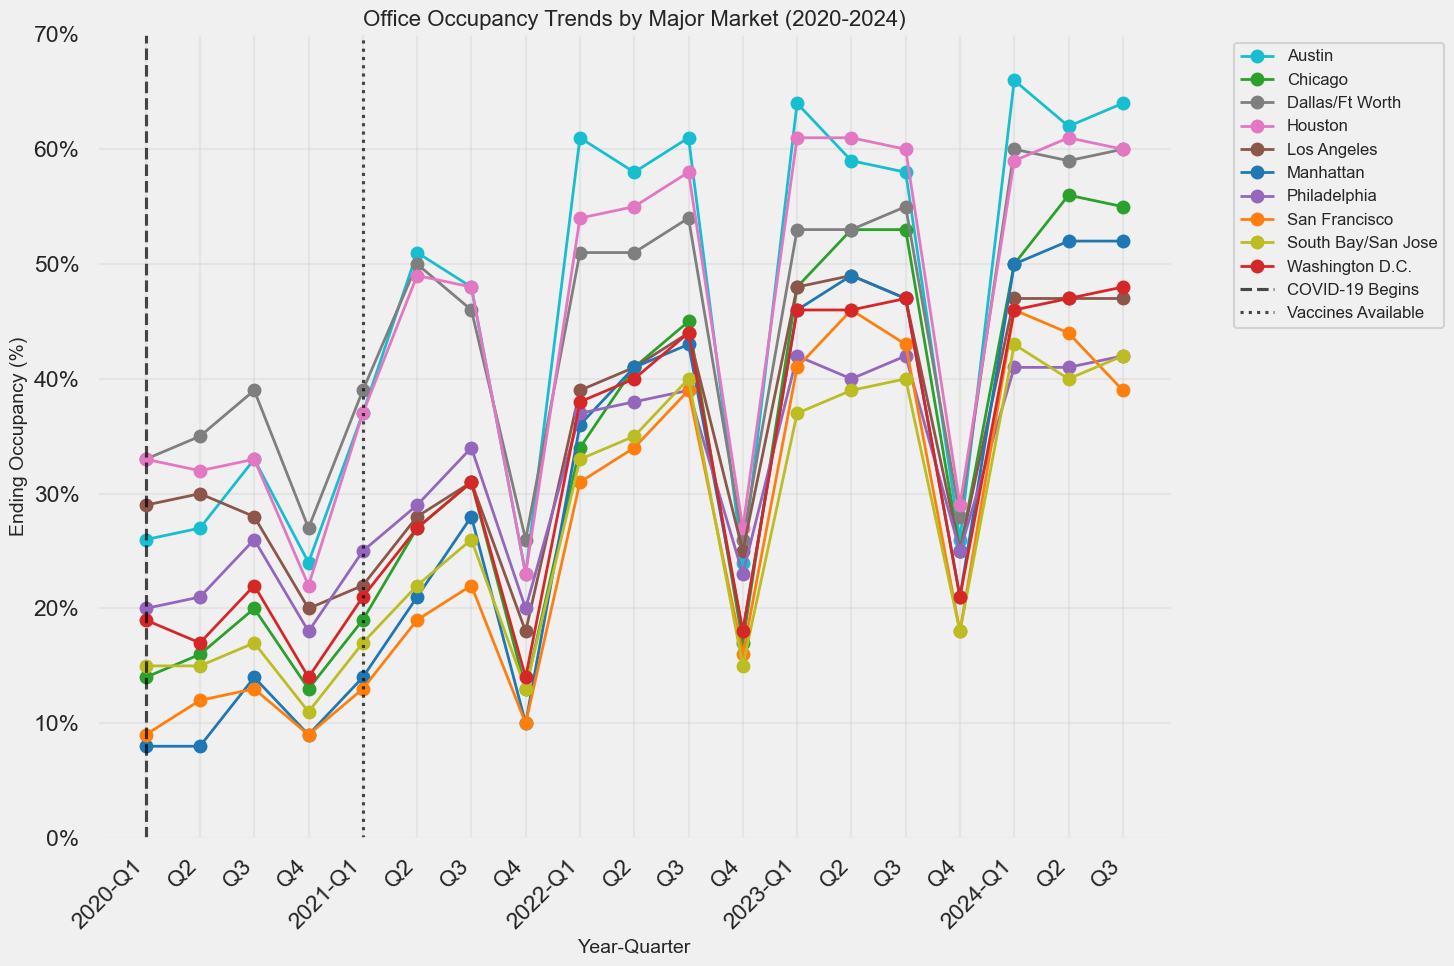

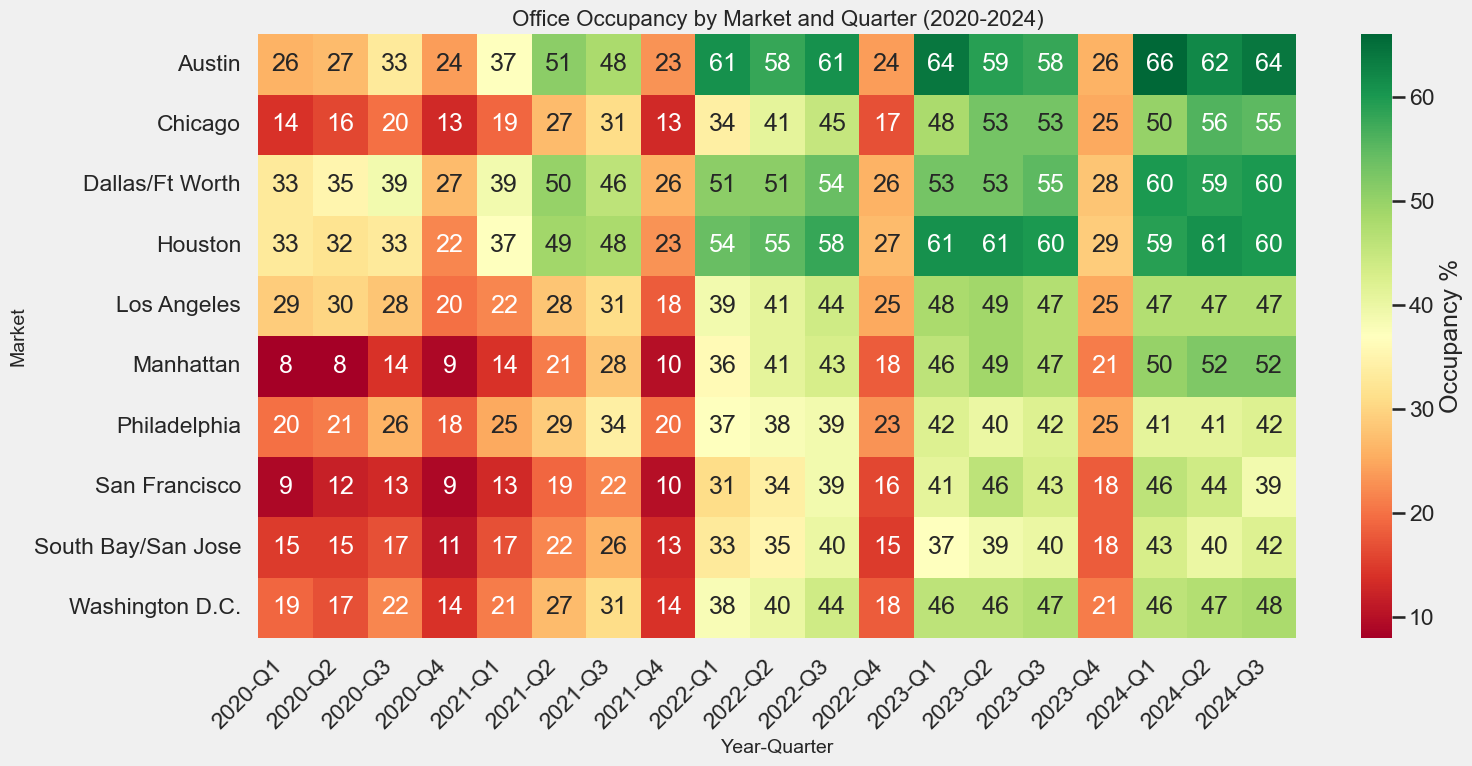

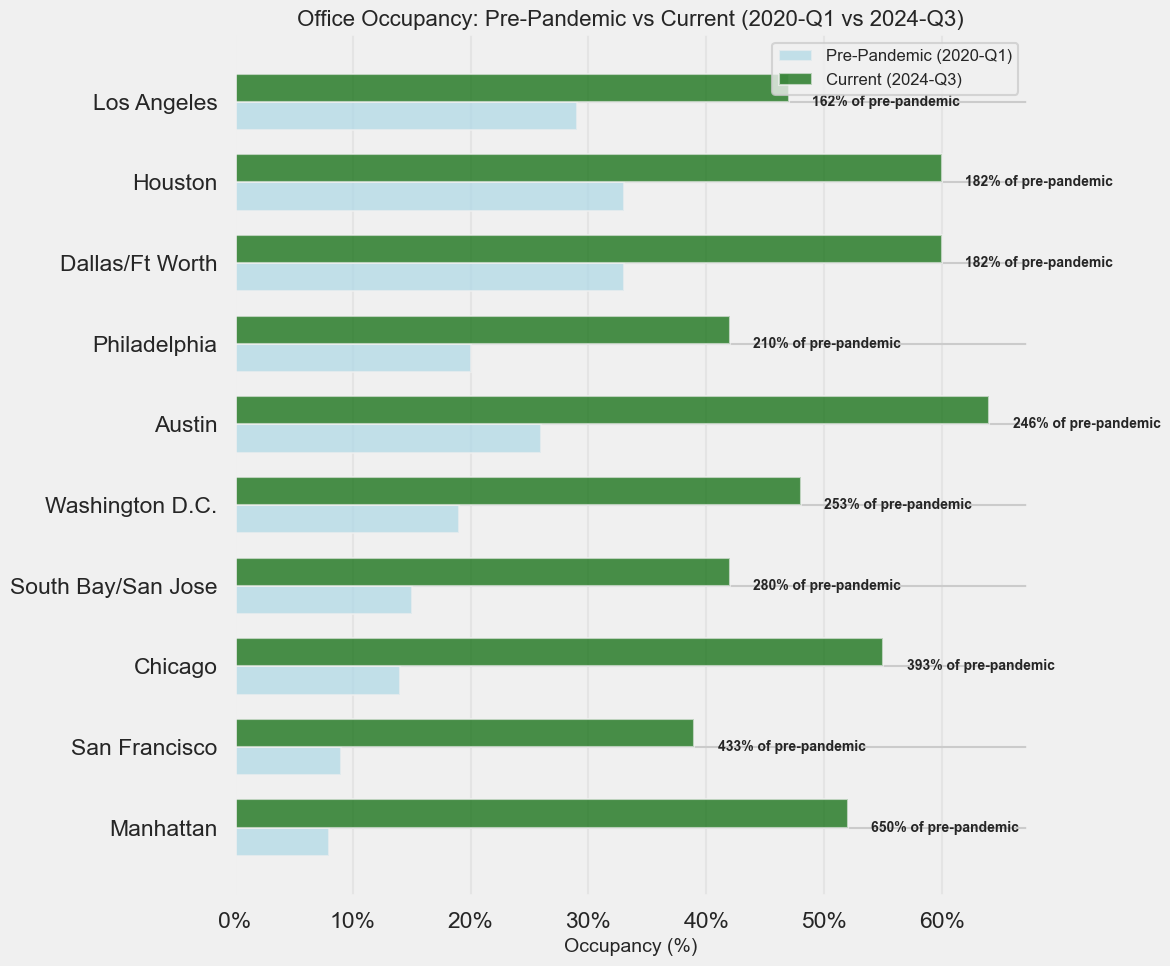

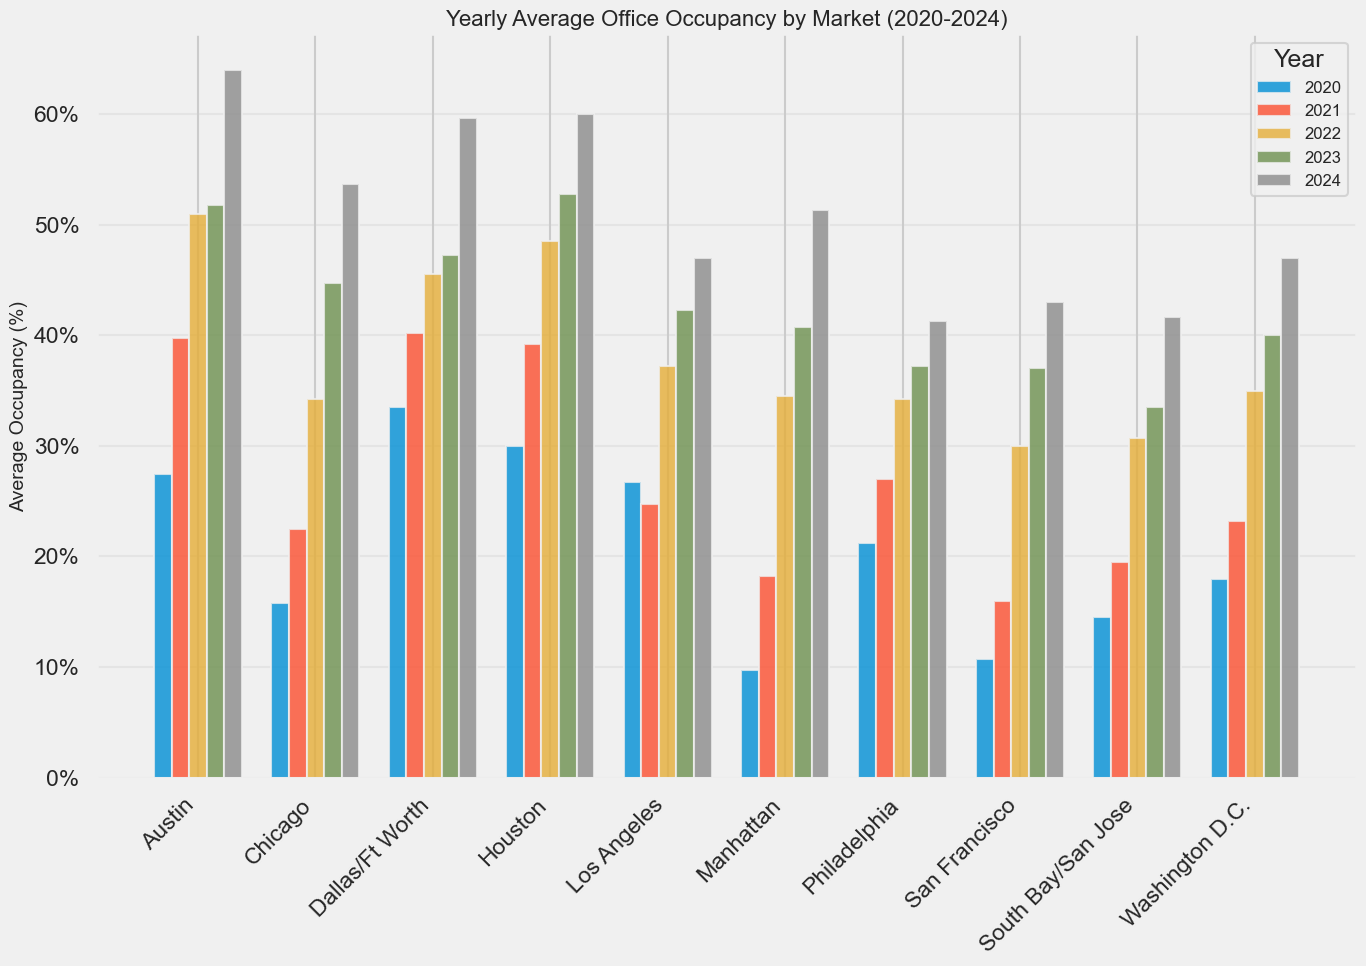

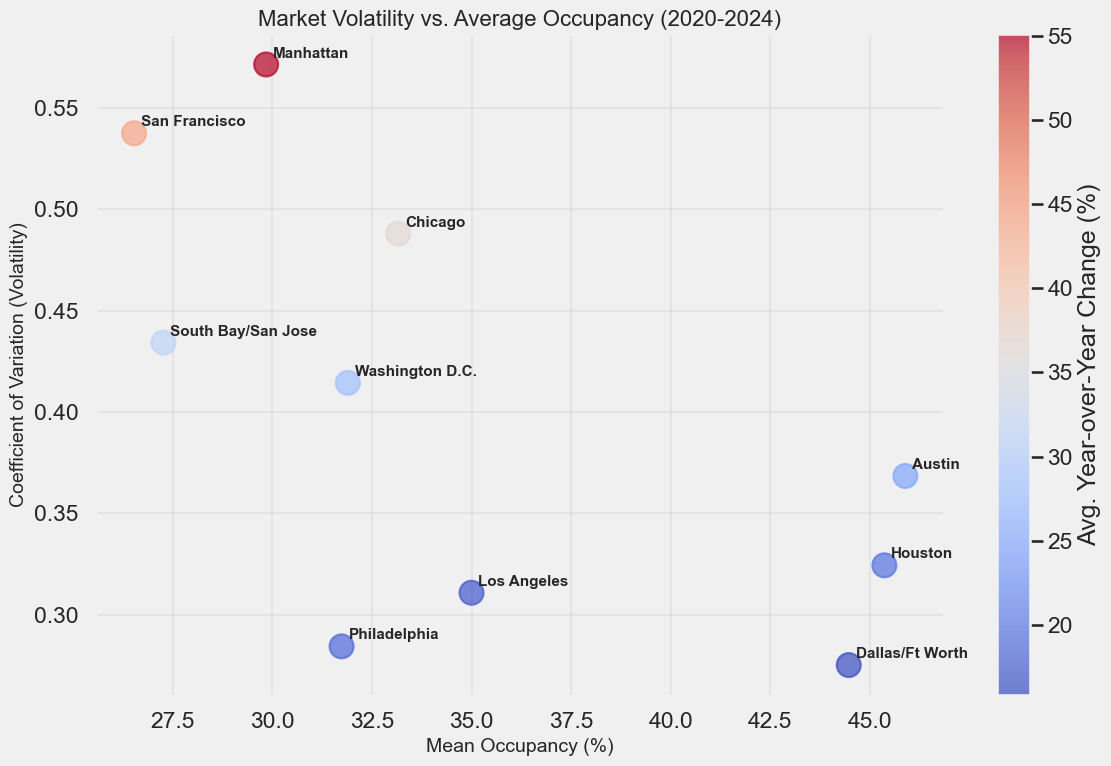

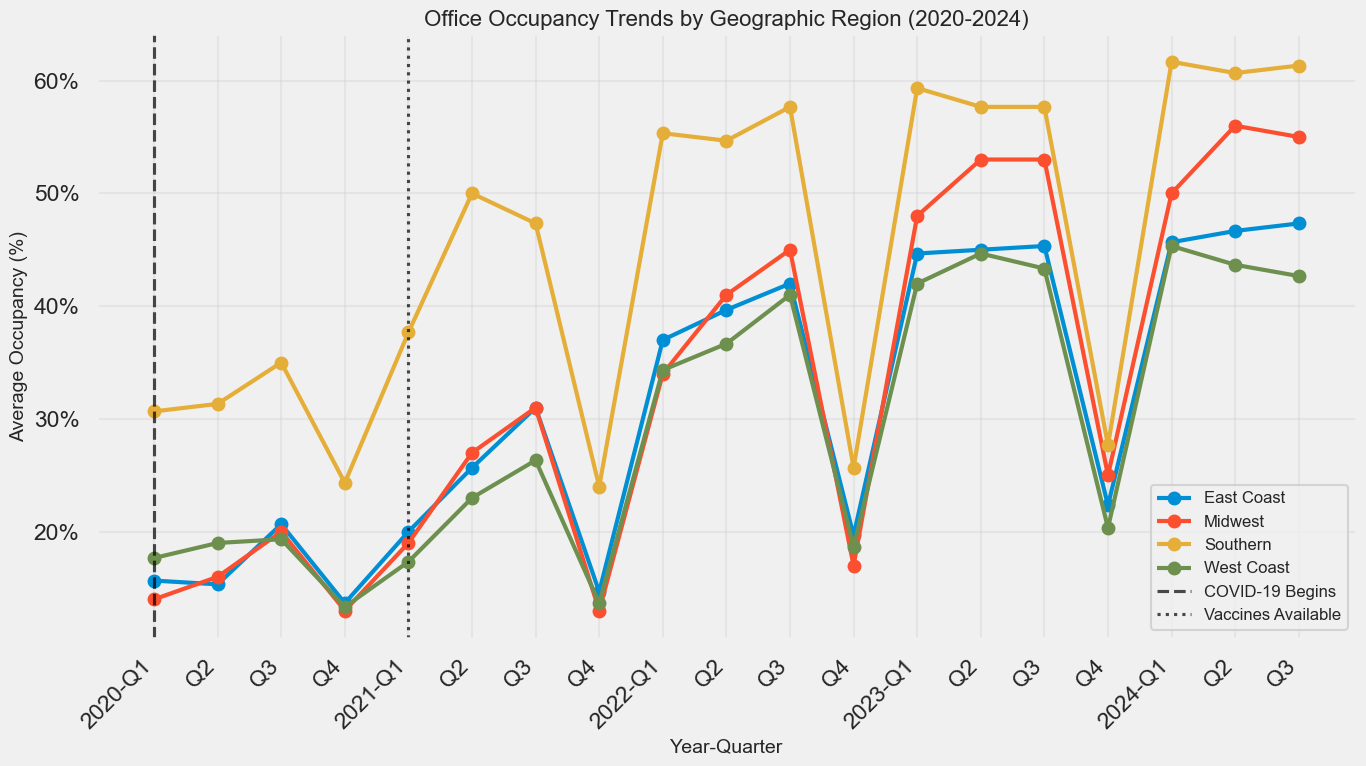

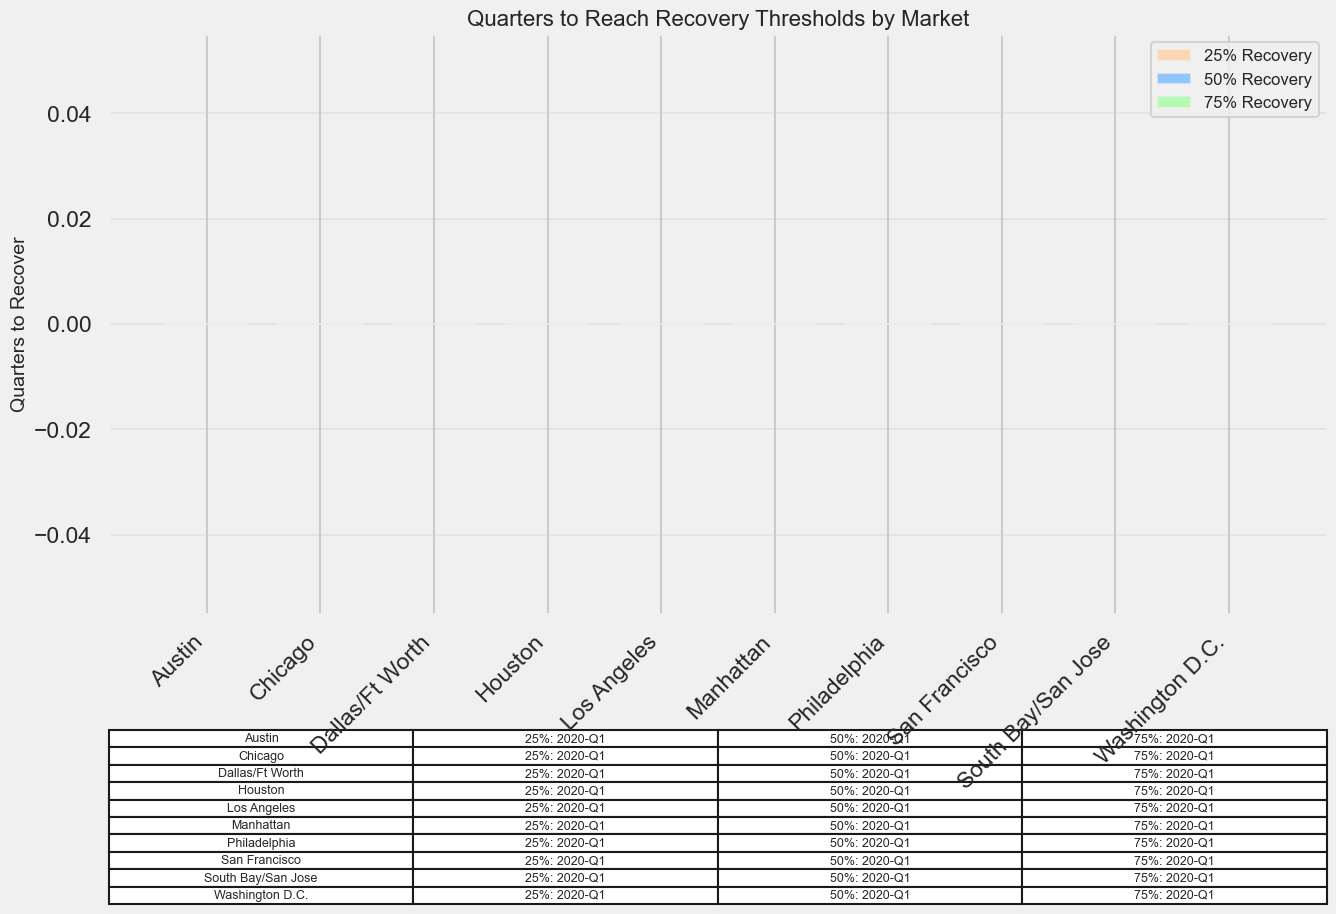

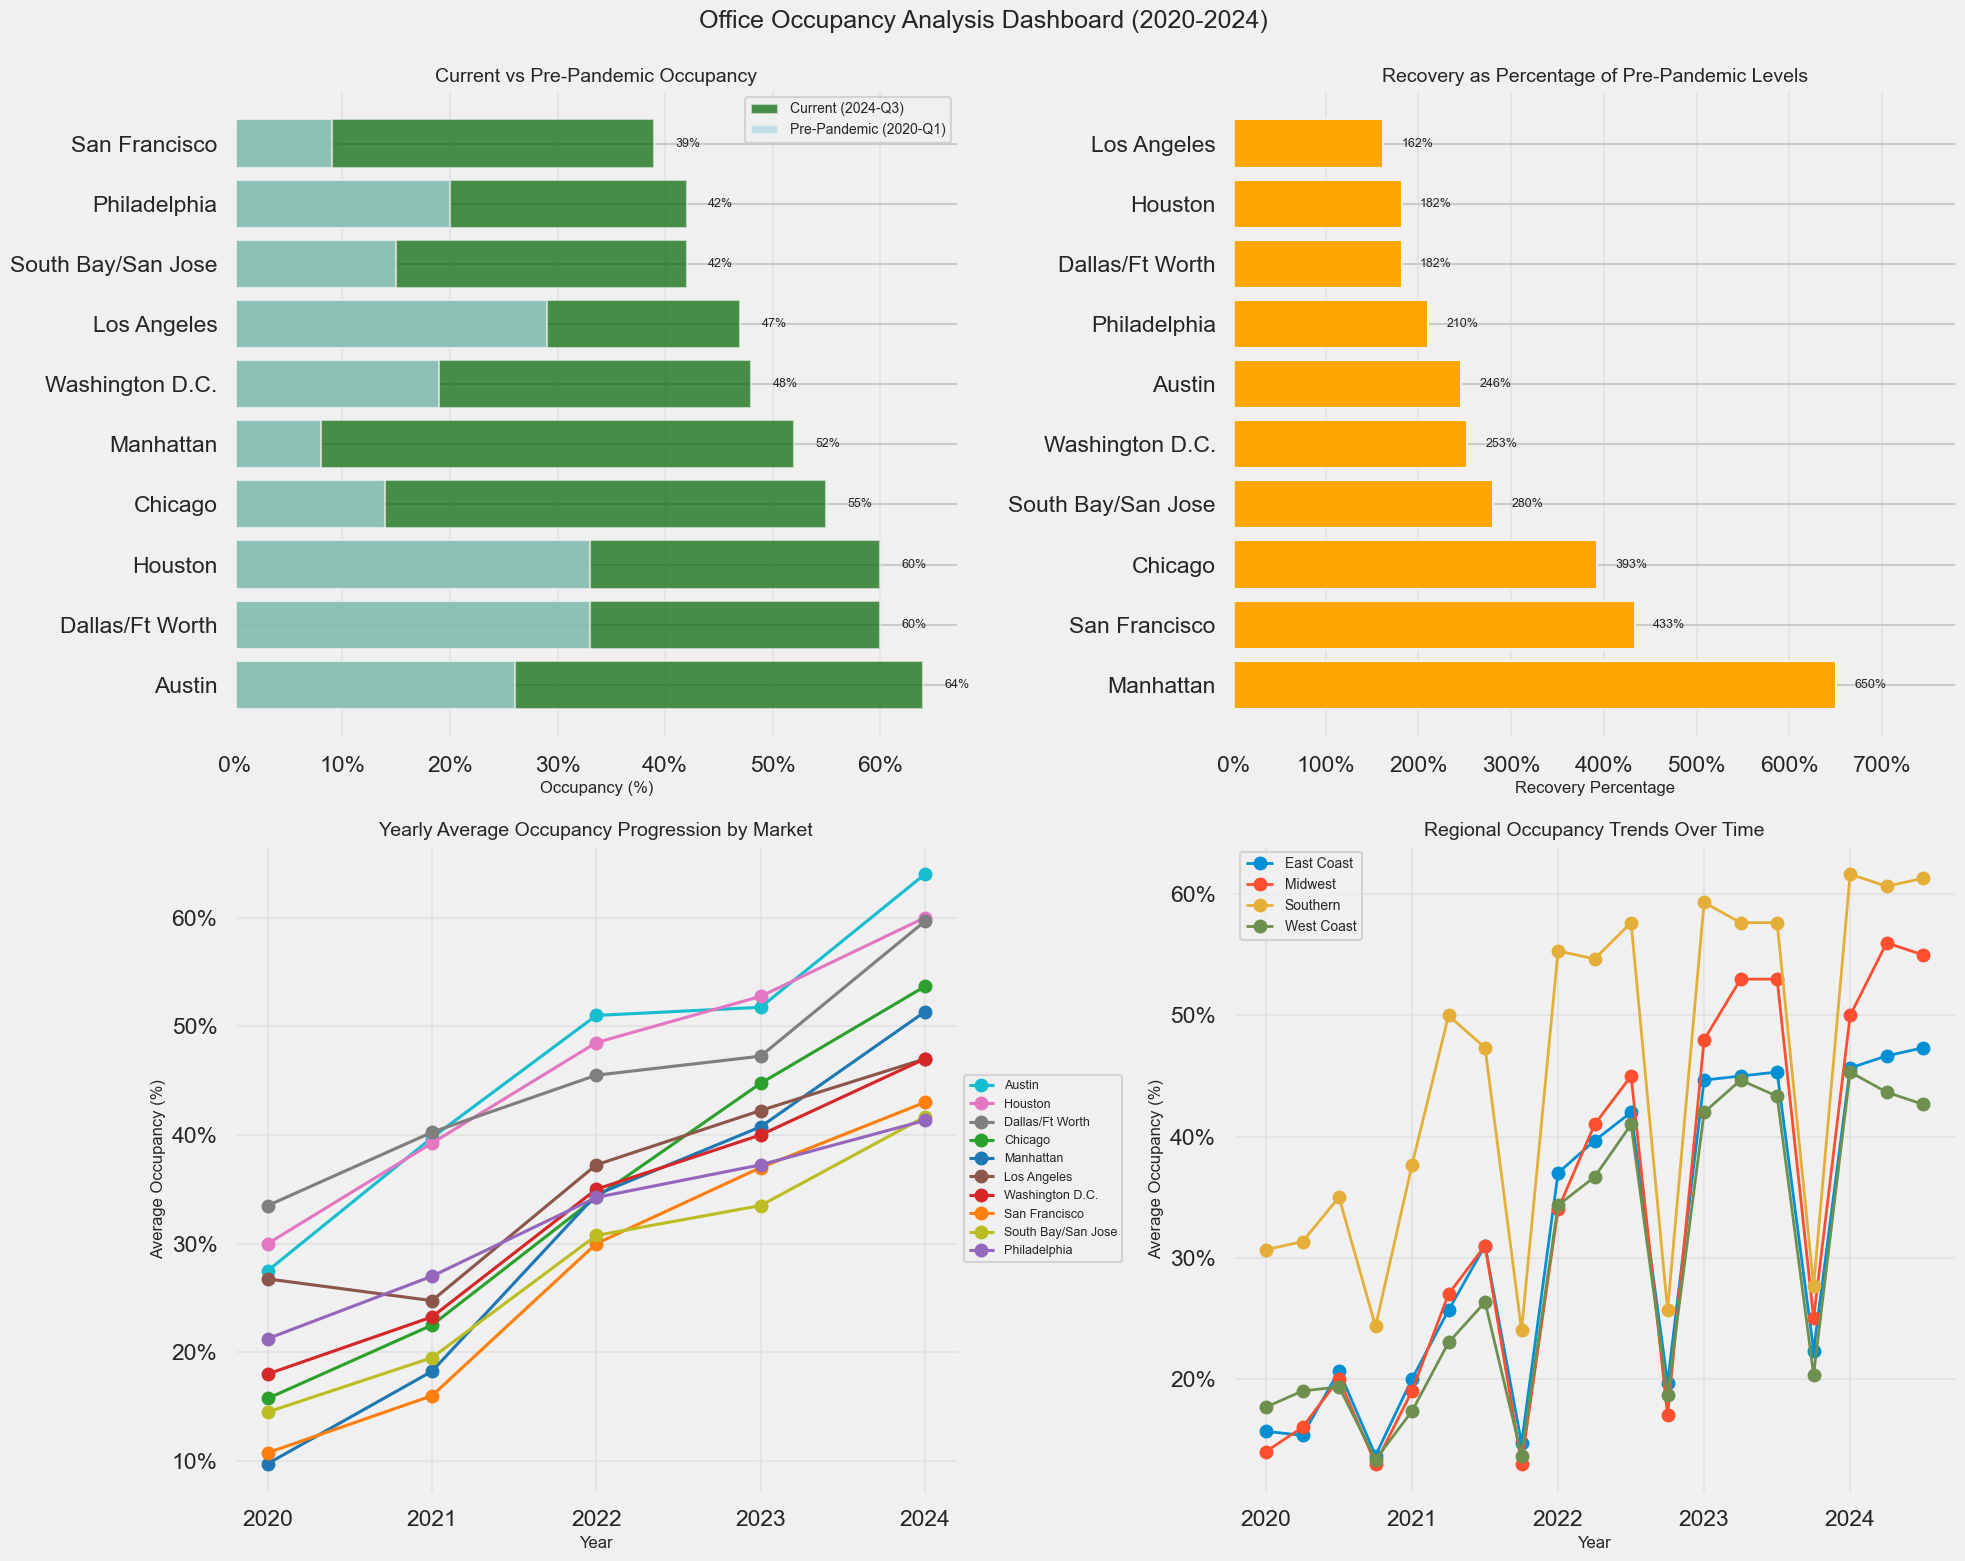

Analysis complete - all visualizations generated successfully!


In [12]:

# Set style for all plots
plt.style.use('fivethirtyeight')
sns.set_context("talk")

# Custom color palette for markets
MARKET_COLORS = {
    "Manhattan": "#1f77b4",
    "San Francisco": "#ff7f0e",
    "Chicago": "#2ca02c",
    "Washington D.C.": "#d62728",
    "Philadelphia": "#9467bd",
    "Los Angeles": "#8c564b",
    "Houston": "#e377c2",
    "Dallas/Ft Worth": "#7f7f7f",
    "South Bay/San Jose": "#bcbd22",
    "Austin": "#17becf"
}

# Function to format percentages on axes
def percentage_formatter(x, pos):
    return f'{int(x)}%'

# Load the data
df = pd.read_csv('Market_Occupancy.csv')

# Basic data preparation
# Create a composite period for time series (year-quarter)
df['period'] = df['year'].astype(str) + '-' + df['quarter']

# Convert proportions to percentages for easier interpretation
df['ending_occupancy_pct'] = df['ending_occupancy_proportion'] * 100
df['starting_occupancy_pct'] = df['starting_occupancy_proportion'] * 100
df['avg_occupancy_pct'] = df['avg_occupancy_proportion'] * 100
df['occupancy_drop'] = df['starting_occupancy_proportion'] - df['ending_occupancy_proportion']
df['occupancy_drop_pct'] = df['occupancy_drop'] * 100

# Create a numeric period column for proper time series ordering
df['period_num'] = df['year'] + df['quarter'].apply(lambda q: {'Q1': 0.0, 'Q2': 0.25, 'Q3': 0.5, 'Q4': 0.75}[q])

# Sort by market and period for proper time series
df = df.sort_values(['market', 'period_num'])

# Get the list of markets and periods
markets = df['market'].unique()
periods = sorted(df['period'].unique())

print(f"Analyzing {len(markets)} markets over {len(periods)} quarters from {periods[0]} to {periods[-1]}")

# 1. Time Series Plot: Occupancy Trends by Market
plt.figure(figsize=(15, 10))
for market in markets:
    market_data = df[df['market'] == market]
    plt.plot(market_data['period_num'], market_data['ending_occupancy_pct'], 
             marker='o', linewidth=2, label=market, color=MARKET_COLORS[market])

# Add vertical lines for key events
plt.axvline(x=2020.0, color='black', linestyle='--', alpha=0.7, label='COVID-19 Begins')
plt.axvline(x=2021.0, color='black', linestyle=':', alpha=0.7, label='Vaccines Available')

plt.title('Office Occupancy Trends by Major Market (2020-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Ending Occupancy (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the x-axis to show year-quarter
plt.xticks([2020, 2020.25, 2020.5, 2020.75, 
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75, 
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5],
           ['2020-Q1', 'Q2', 'Q3', 'Q4', 
            '2021-Q1', 'Q2', 'Q3', 'Q4', 
            '2022-Q1', 'Q2', 'Q3', 'Q4', 
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3'], 
           rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.ylim(0, 70)
plt.tight_layout()
plt.show()

# 2. Heatmap: Occupancy by Market and Time
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='ending_occupancy_pct', 
                             index='market', 
                             columns='period',
                             aggfunc='mean')

plt.figure(figsize=(16, 8))
ax = sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt='.0f', 
                cbar_kws={'label': 'Occupancy %'})
plt.title('Office Occupancy by Market and Quarter (2020-2024)', fontsize=16)
plt.ylabel('Market', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Pre-Pandemic vs Current Comparison
# Get data for first period (2020-Q1) and last period
first_period = periods[0]
last_period = periods[-1]

pre_pandemic = df[df['period'] == first_period].copy()
current = df[df['period'] == last_period].copy()

# Merge the data
comparison = pre_pandemic[['market', 'ending_occupancy_pct']].rename(
    columns={'ending_occupancy_pct': 'pre_pandemic_occupancy'})
comparison = comparison.merge(
    current[['market', 'ending_occupancy_pct']].rename(
        columns={'ending_occupancy_pct': 'current_occupancy'}),
    on='market')

# Calculate recovery percentage
comparison['recovery_pct'] = (comparison['current_occupancy'] / comparison['pre_pandemic_occupancy']) * 100
comparison = comparison.sort_values('recovery_pct', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))

# Create bars for both pre-pandemic and current occupancy
x = np.arange(len(comparison))
width = 0.35

ax.barh(x - width/2, comparison['pre_pandemic_occupancy'], width, 
        label='Pre-Pandemic (2020-Q1)', color='lightblue', alpha=0.7)
ax.barh(x + width/2, comparison['current_occupancy'], width,
        label='Current (2024-Q3)', color='darkgreen', alpha=0.7)

# Add market names and recovery percentage
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax.text(max(row['pre_pandemic_occupancy'], row['current_occupancy']) + 2, 
            i, f"{row['recovery_pct']:.0f}% of pre-pandemic", 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(comparison['market'])
ax.set_xlabel('Occupancy (%)', fontsize=14)
ax.set_title('Office Occupancy: Pre-Pandemic vs Current (2020-Q1 vs 2024-Q3)', fontsize=16)
ax.legend(loc='upper right', fontsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Yearly Average Occupancy by Market
# Calculate yearly averages
yearly_avg = df.groupby(['market', 'year'])['ending_occupancy_pct'].mean().reset_index()
yearly_pivot = yearly_avg.pivot(index='market', columns='year', values='ending_occupancy_pct')

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(yearly_pivot.index))
width = 0.15
years = yearly_pivot.columns

# Plot bars for each year
for i, year in enumerate(years):
    ax.bar(x + (i - len(years)/2 + 0.5) * width, yearly_pivot[year], 
           width, label=str(year), alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(yearly_pivot.index, rotation=45, ha='right')
ax.set_ylabel('Average Occupancy (%)', fontsize=14)
ax.set_title('Yearly Average Office Occupancy by Market (2020-2024)', fontsize=16)
ax.legend(title='Year', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Market Volatility Analysis
# Calculate volatility metrics
volatility = []

for market in markets:
    market_data = df[df['market'] == market]
    values = market_data['ending_occupancy_proportion']
    
    mean = values.mean()
    std_dev = values.std()
    cov = std_dev / mean  # Coefficient of variation
    
    year_over_year = []
    for year in range(2021, 2025):
        current_year = market_data[market_data['year'] == year]['ending_occupancy_proportion'].mean()
        prev_year = market_data[market_data['year'] == year-1]['ending_occupancy_proportion'].mean()
        if not np.isnan(current_year) and not np.isnan(prev_year):
            year_over_year.append((current_year / prev_year) - 1)
    
    avg_yoy_change = np.mean(year_over_year) if year_over_year else np.nan
    
    volatility.append({
        'market': market,
        'mean_occupancy': mean * 100,
        'std_dev': std_dev * 100,
        'cov': cov,
        'avg_yoy_change': avg_yoy_change * 100
    })

volatility_df = pd.DataFrame(volatility).sort_values('cov', ascending=False)

# Create a scatter plot of volatility vs. mean occupancy
plt.figure(figsize=(12, 8))
scatter = plt.scatter(volatility_df['mean_occupancy'], volatility_df['cov'], 
                      s=300, c=volatility_df['avg_yoy_change'], 
                      cmap='coolwarm', alpha=0.7)

# Add market labels
for i, row in volatility_df.iterrows():
    plt.annotate(row['market'], 
                (row['mean_occupancy'], row['cov']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.colorbar(scatter, label='Avg. Year-over-Year Change (%)')
plt.xlabel('Mean Occupancy (%)', fontsize=14)
plt.ylabel('Coefficient of Variation (Volatility)', fontsize=14)
plt.title('Market Volatility vs. Average Occupancy (2020-2024)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Geographic Clusters and Recovery Patterns
# Define geographic clusters
west_coast = ['San Francisco', 'Los Angeles', 'South Bay/San Jose']
east_coast = ['Manhattan', 'Washington D.C.', 'Philadelphia']
southern = ['Houston', 'Dallas/Ft Worth', 'Austin']
midwest = ['Chicago']

# Calculate average occupancy by cluster and period
df['region'] = 'Other'
for market in west_coast:
    df.loc[df['market'] == market, 'region'] = 'West Coast'
for market in east_coast:
    df.loc[df['market'] == market, 'region'] = 'East Coast'
for market in southern:
    df.loc[df['market'] == market, 'region'] = 'Southern'
for market in midwest:
    df.loc[df['market'] == market, 'region'] = 'Midwest'

region_avg = df.groupby(['region', 'period_num'])['ending_occupancy_pct'].mean().reset_index()

# Plot regional trends
plt.figure(figsize=(14, 8))
for region in region_avg['region'].unique():
    region_data = region_avg[region_avg['region'] == region]
    plt.plot(region_data['period_num'], region_data['ending_occupancy_pct'], 
             marker='o', linewidth=3, label=region)

plt.axvline(x=2020.0, color='black', linestyle='--', alpha=0.7, label='COVID-19 Begins')
plt.axvline(x=2021.0, color='black', linestyle=':', alpha=0.7, label='Vaccines Available')

plt.title('Office Occupancy Trends by Geographic Region (2020-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Average Occupancy (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.xticks([2020, 2020.25, 2020.5, 2020.75, 
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75, 
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5],
           ['2020-Q1', 'Q2', 'Q3', 'Q4', 
            '2021-Q1', 'Q2', 'Q3', 'Q4', 
            '2022-Q1', 'Q2', 'Q3', 'Q4', 
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3'], 
           rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.tight_layout()
plt.show()

# 7. Recovery Phase Analysis
# Calculate quarters to recover to specific thresholds
recovery_thresholds = {
    '25%': 25,
    '50%': 50,
    '75%': 75
}

recovery_data = []
baseline = df[df['period'] == '2020-Q1'].copy()

for market in markets:
    market_baseline = baseline[baseline['market'] == market]['ending_occupancy_pct'].values[0]
    market_data = df[df['market'] == market].sort_values('period_num')
    
    recovery_info = {'market': market, 'baseline': market_baseline}
    
    for threshold_name, threshold_pct in recovery_thresholds.items():
        threshold_value = market_baseline * (threshold_pct / 100)
        
        # Find the first period where occupancy exceeds the threshold
        recovery_period = market_data[market_data['ending_occupancy_pct'] >= threshold_value]
        
        if not recovery_period.empty:
            first_recovery = recovery_period.iloc[0]
            quarters_to_recover = (first_recovery['period_num'] - 2020.0) * 4
            recovery_info[f'quarters_to_{threshold_name}'] = quarters_to_recover
            recovery_info[f'period_{threshold_name}'] = first_recovery['period']
        else:
            recovery_info[f'quarters_to_{threshold_name}'] = np.nan
            recovery_info[f'period_{threshold_name}'] = 'Not Recovered'
    
    recovery_data.append(recovery_info)

recovery_df = pd.DataFrame(recovery_data)

# Plot recovery phases
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(recovery_df))
width = 0.25

# Plot bars for each recovery threshold
thresholds = ['25%', '50%', '75%']
colors = ['#ffcc99', '#66b3ff', '#99ff99']

for i, threshold in enumerate(thresholds):
    valid_data = recovery_df[~recovery_df[f'quarters_to_{threshold}'].isna()]
    
    if not valid_data.empty:
        ax.bar(x[valid_data.index] + (i - 1) * width, valid_data[f'quarters_to_{threshold}'], 
               width, label=f'{threshold} Recovery', color=colors[i], alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(recovery_df['market'], rotation=45, ha='right')
ax.set_ylabel('Quarters to Recover', fontsize=14)
ax.set_title('Quarters to Reach Recovery Thresholds by Market', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add a text table of recovery periods
table_text = []
for idx, row in recovery_df.iterrows():
    market_text = [
        f"{row['market']}",
        f"25%: {row['period_25%']}",
        f"50%: {row['period_50%']}",
        f"75%: {row['period_75%']}"
    ]
    table_text.append(market_text)

# Add table to the plot
table = ax.table(cellText=table_text, 
                loc='bottom', 
                cellLoc='center', 
                bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

plt.subplots_adjust(bottom=0.3)
plt.show()

# 8. Comprehensive Dashboard with Multiple Metrics
# Create a 2x2 dashboard with key metrics
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Plot 1: Current occupancy vs pre-pandemic
ax1 = plt.subplot(gs[0, 0])
comparison = comparison.sort_values('current_occupancy', ascending=False)

bars1 = ax1.barh(comparison['market'], comparison['current_occupancy'], 
                color='darkgreen', alpha=0.7, label='Current (2024-Q3)')
bars2 = ax1.barh(comparison['market'], comparison['pre_pandemic_occupancy'], 
                color='lightblue', alpha=0.7, label='Pre-Pandemic (2020-Q1)')

# Add percentage labels
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax1.text(row['current_occupancy'] + 2, i, 
            f"{row['current_occupancy']:.0f}%", 
            va='center', fontsize=9)

ax1.set_xlabel('Occupancy (%)', fontsize=12)
ax1.set_title('Current vs Pre-Pandemic Occupancy', fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Recovery percentage
ax2 = plt.subplot(gs[0, 1])
comparison = comparison.sort_values('recovery_pct', ascending=False)

bars = ax2.barh(comparison['market'], comparison['recovery_pct'], color='orange')

# Add percentage labels
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax2.text(row['recovery_pct'] + 20, i, 
            f"{row['recovery_pct']:.0f}%", 
            va='center', fontsize=9)

ax2.set_xlabel('Recovery Percentage', fontsize=12)
ax2.set_title('Recovery as Percentage of Pre-Pandemic Levels', fontsize=14)
ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim(0, max(comparison['recovery_pct']) * 1.2)

# Plot 3: Yearly progression
ax3 = plt.subplot(gs[1, 0])
yearly_pivot = yearly_pivot.sort_values(2024, ascending=False)

# Create a stacked area chart
x = yearly_pivot.columns.astype(float)
for i, market in enumerate(yearly_pivot.index):
    ax3.plot(x, yearly_pivot.loc[market], 'o-', label=market, color=MARKET_COLORS[market])

ax3.set_xticks(x)
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Average Occupancy (%)', fontsize=12)
ax3.set_title('Yearly Average Occupancy Progression by Market', fontsize=14)
ax3.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax3.grid(True, alpha=0.3)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

# Plot 4: Regional trends
ax4 = plt.subplot(gs[1, 1])

for region in region_avg['region'].unique():
    region_data = region_avg[region_avg['region'] == region]
    if region != 'Other':  # Skip the "Other" category if it exists
        ax4.plot(region_data['period_num'], region_data['ending_occupancy_pct'], 
                'o-', linewidth=2, label=region)

ax4.set_xticks([2020, 2021, 2022, 2023, 2024])
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Average Occupancy (%)', fontsize=12)
ax4.set_title('Regional Occupancy Trends Over Time', fontsize=14)
ax4.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=10)

plt.suptitle('Office Occupancy Analysis Dashboard (2020-2024)', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("Analysis complete - all visualizations generated successfully!")